<a href="https://colab.research.google.com/github/tcnisaa/Pengolahan_Sinyal/blob/main/Pengosin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengolahan Sinyal Kelompok 2 - Chapter 3

- Tangguh Chairunnisa
- Rachel Savitri
- Namira Nurfaliani
- Faundra Bima
- Adrian Septiyadi

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Libraries

In [ ]:
!pip install dtcwt
!pip install wfdb
!pip install PyWavelets
!pip install EMD-signal

## Load Dataset

In [ ]:
import os
import wfdb

# Path ke folder MIT-BIH Arrhythmia Dataset dalam Google Drive
data_path = "/content/drive/MyDrive/Colab Notebooks/mit-bih-arrhythmia-dataset/"

# Ambil semua nama file rekaman
record_files = sorted([f[:-4] for f in os.listdir(data_path) if f.endswith(".dat")])

print("Total rekaman ditemukan:", len(record_files))
print("Daftar rekaman:", record_files[:10])  #10 file

Total rekaman ditemukan: 48
Daftar rekaman: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109']


## Analisis Statistik Dasar

In [ ]:
import pandas as pd
import numpy as np
#menghitung statistik dasar untuk semua file
stats_list = []

for record_name in record_files:

    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]

    stats = {
        "File": record_name,
        "Mean": np.mean(signal),
        "Std Dev": np.std(signal),
        "Min": np.min(signal),
        "Max": np.max(signal),
        "Median": np.median(signal)
    }
    stats_list.append(stats)

df_stats = pd.DataFrame(stats_list)
print(df_stats)


   File      Mean   Std Dev    Min    Max  Median
0   100 -0.306299  0.193200 -2.715  1.435  -0.335
1   101 -0.284222  0.261156 -3.175  2.420  -0.330
2   102 -0.245854  0.190489 -1.660  1.375  -0.280
3   103 -0.231430  0.321840 -2.610  3.125  -0.290
4   104 -0.225075  0.250382 -1.935  1.975  -0.240
5   105 -0.225155  0.405085 -3.715  3.000  -0.275
6   106 -0.177832  0.368060 -2.065  2.570  -0.250
7   107 -0.232644  0.858033 -3.315  3.465  -0.340
8   108 -0.228679  0.300803 -3.035  2.365  -0.240
9   109 -0.230325  0.499214 -3.195  3.130  -0.275
10  111 -0.163806  0.257030 -2.820  2.375  -0.195
11  112 -0.822396  0.223552 -2.635  0.820  -0.820
12  113 -0.155141  0.412601 -1.225  2.550  -0.280
13  114 -0.155483  0.171337 -2.390  1.815  -0.165
14  115 -0.488106  0.363434 -2.885  2.410  -0.535
15  116 -0.936310  0.664115 -5.120  5.115  -1.050
16  117 -0.851854  0.238947 -3.015  0.710  -0.890
17  118 -0.858077  0.428038 -3.090  2.395  -0.825
18  119 -0.861146  0.535485 -2.985  2.500  -0.940


## Visualisasi Sinyal

### Visualisasi dengan interval detik

Membaca file: 100


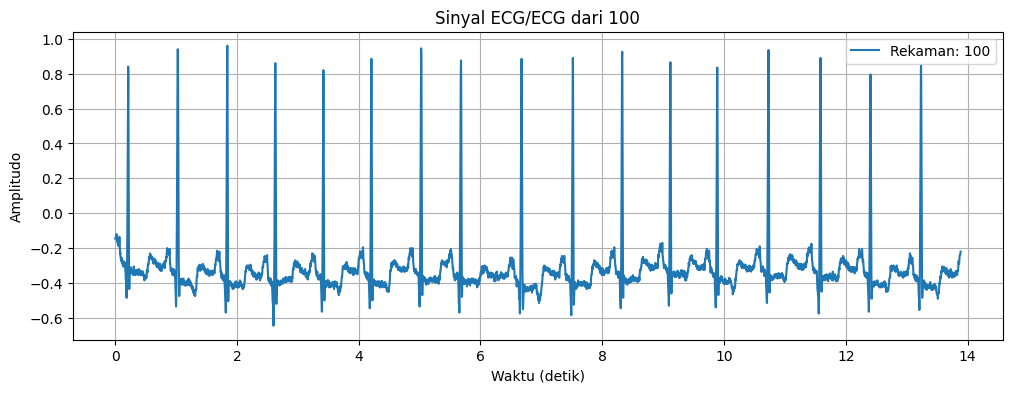

Membaca file: 101


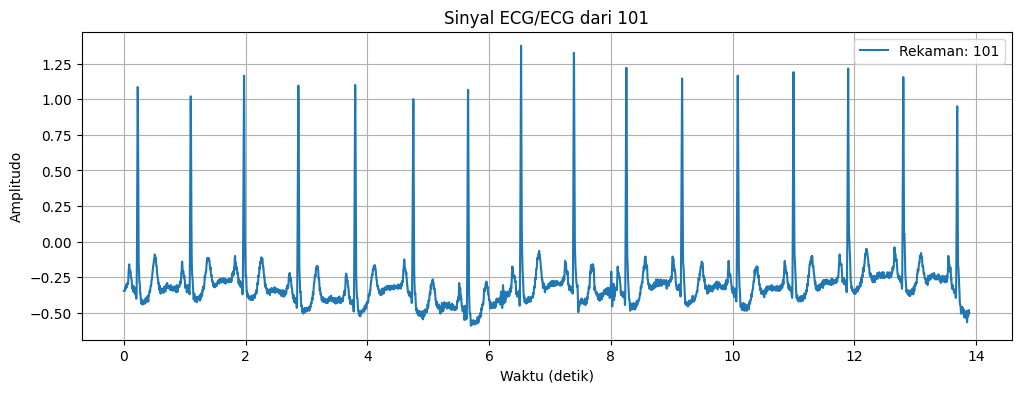

Membaca file: 102


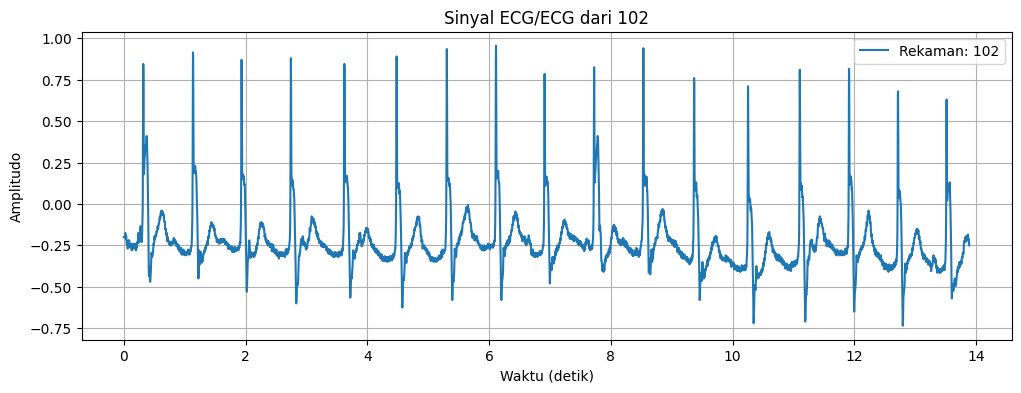

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# membaca dan menampilkan sinyal dari semua file
for record_name in record_files:
    print(f"Membaca file: {record_name}")

    # membaaca rekaman dan anotasi
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    annotation = wfdb.rdann(os.path.join(data_path, record_name), "atr")

    # Ambil data sinyal pertama
    signal = record.p_signal[:, 0]
    fs = record.fs
    time = np.arange(len(signal)) / fs

    # Visualisasi sinyal
    plt.figure(figsize=(12, 4))
    plt.plot(time[:5000], signal[:5000], label=f"Rekaman: {record_name}")
    plt.xlabel("Waktu (detik)")
    plt.ylabel("Amplitudo")
    plt.title(f"Sinyal ECG/ECG dari {record_name}")
    plt.legend()
    plt.grid()
    plt.show()

    # file limitation
    if record_files.index(record_name) >= 2:  # tampilkan 3 file pertama
        break


### Visualisas dengan interval milidetik agar lebih detail

Membaca file: 100


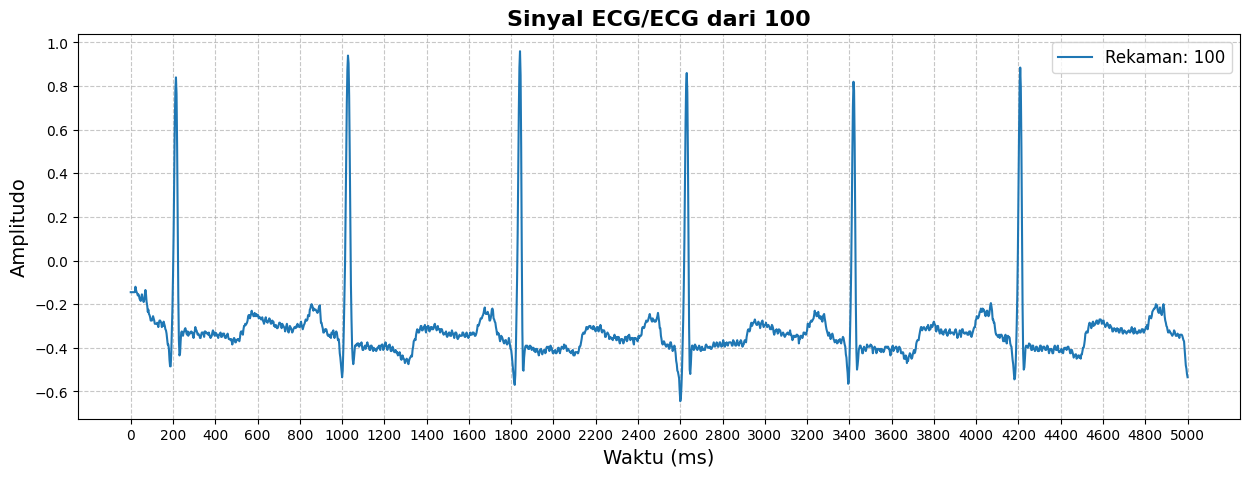

Membaca file: 101


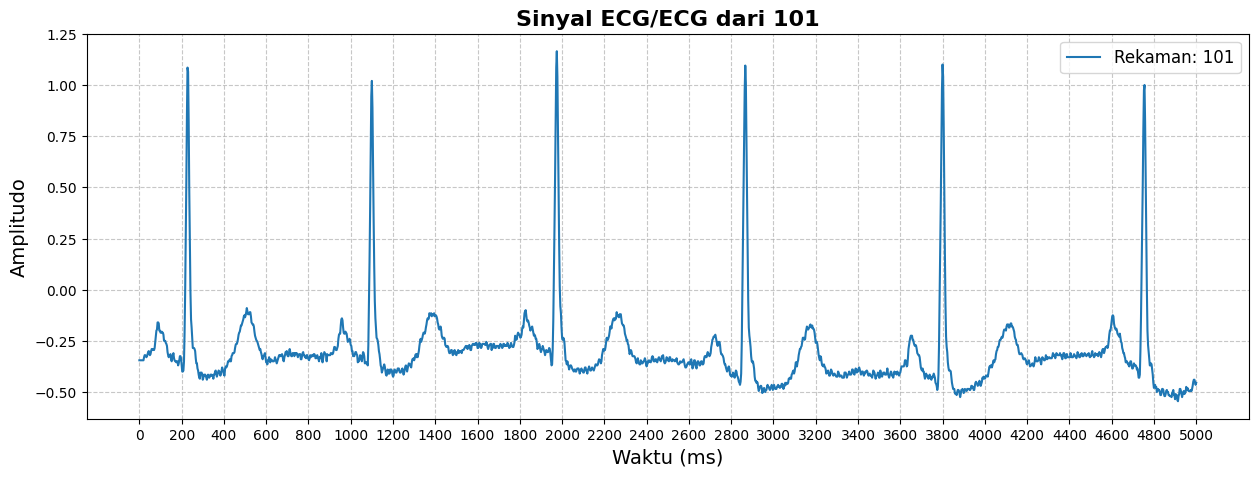

Membaca file: 102


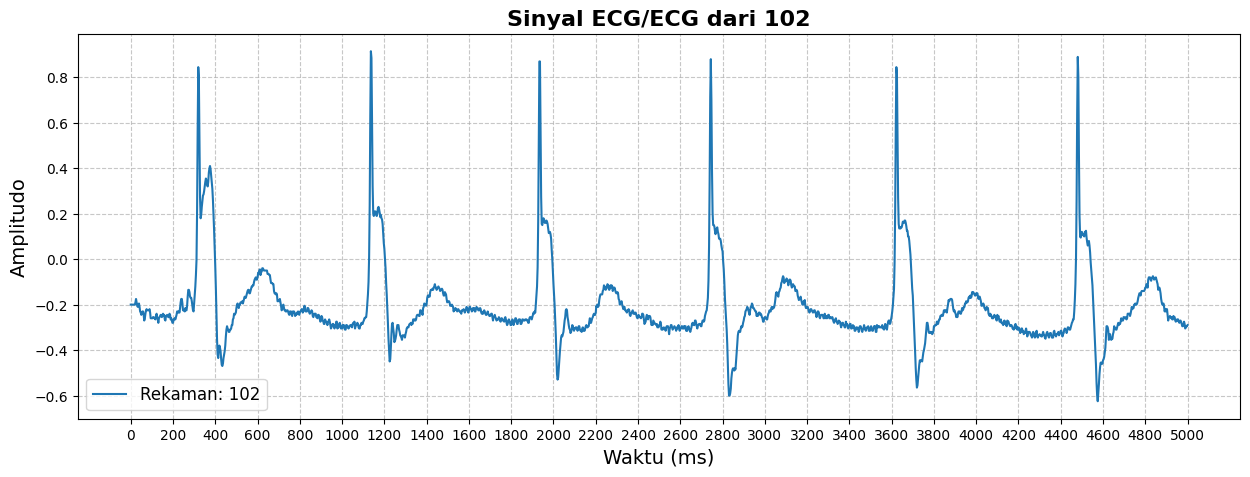

In [ ]:
for record_name in record_files:
    print(f"Membaca file: {record_name}")

    # Membaca rekaman dan anotasi
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    annotation = wfdb.rdann(os.path.join(data_path, record_name), "atr")

    # Ambil data sinyal pertama
    signal = record.p_signal[:, 0]
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Ubah detik ke milidetik

    # Filter hanya rentang 0 - 5000 ms
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # Visualisasi sinyal
    plt.figure(figsize=(15, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)

    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG/ECG dari {record_name}", fontsize=16, fontweight="bold")

    # Atur interval sumbu X setiap 200 ms
    plt.xticks(np.arange(0, 5200, 200))

    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # Batasi jumlah file yang divisualisasikan
    if record_files.index(record_name) >= 2:  # tampilkan 3 file pertama
        break

## Analisis dengan Parametric Model-Based Methods

### Analisis FFT (Fast Fourier Transform)

Membaca file: 100


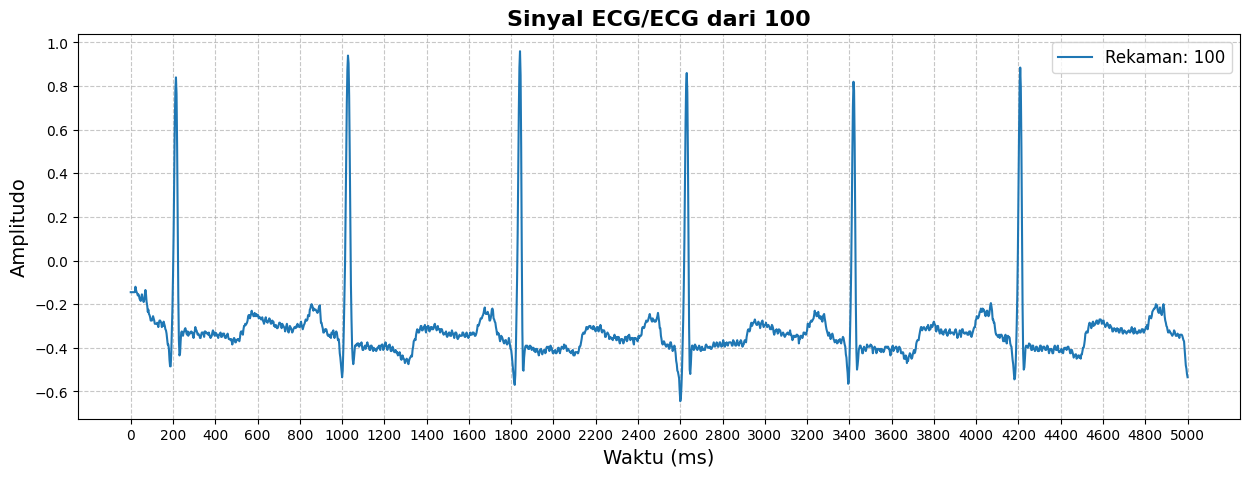

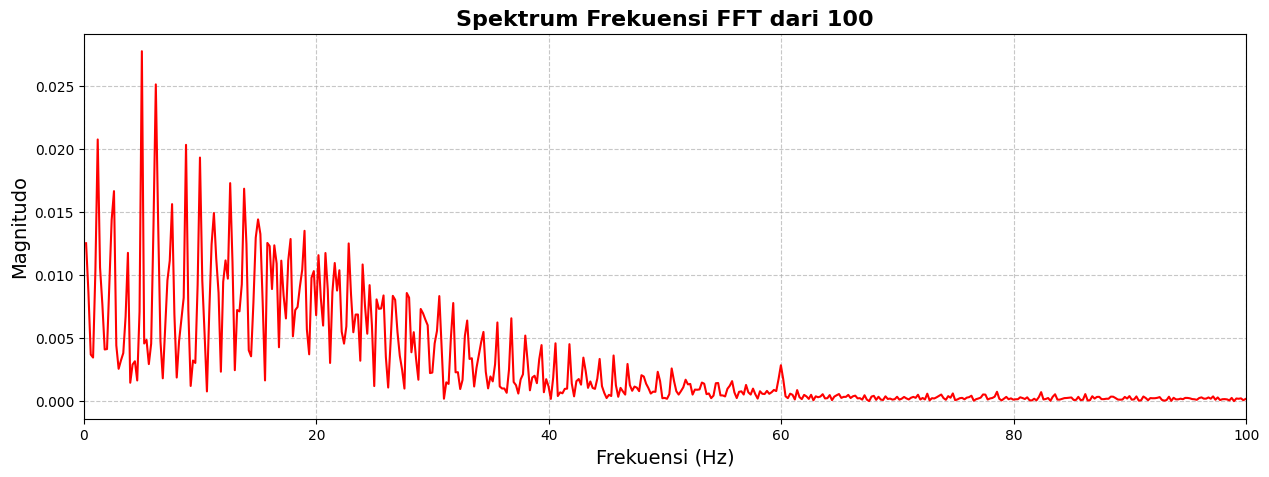

Membaca file: 101


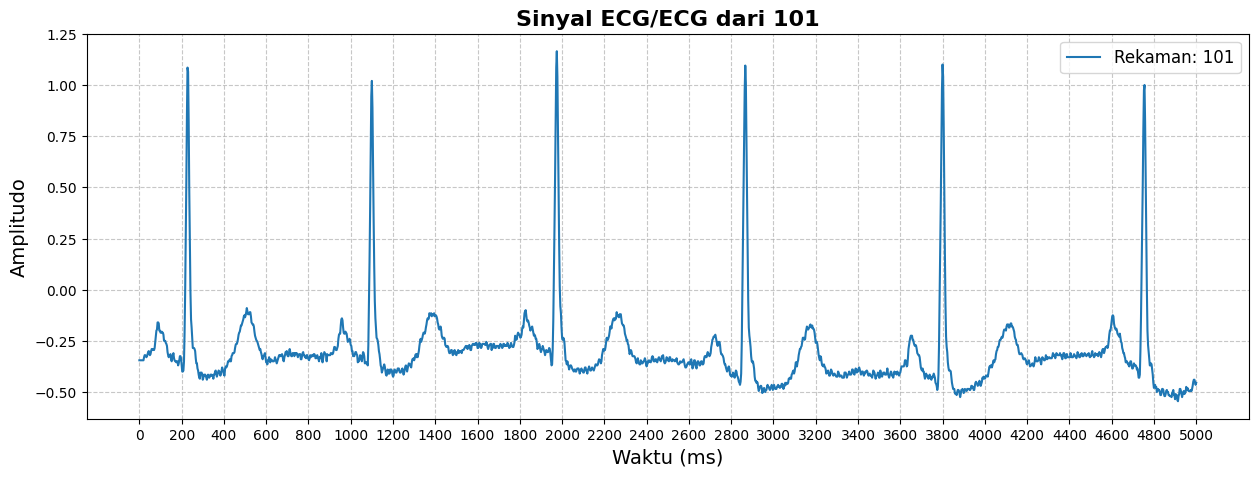

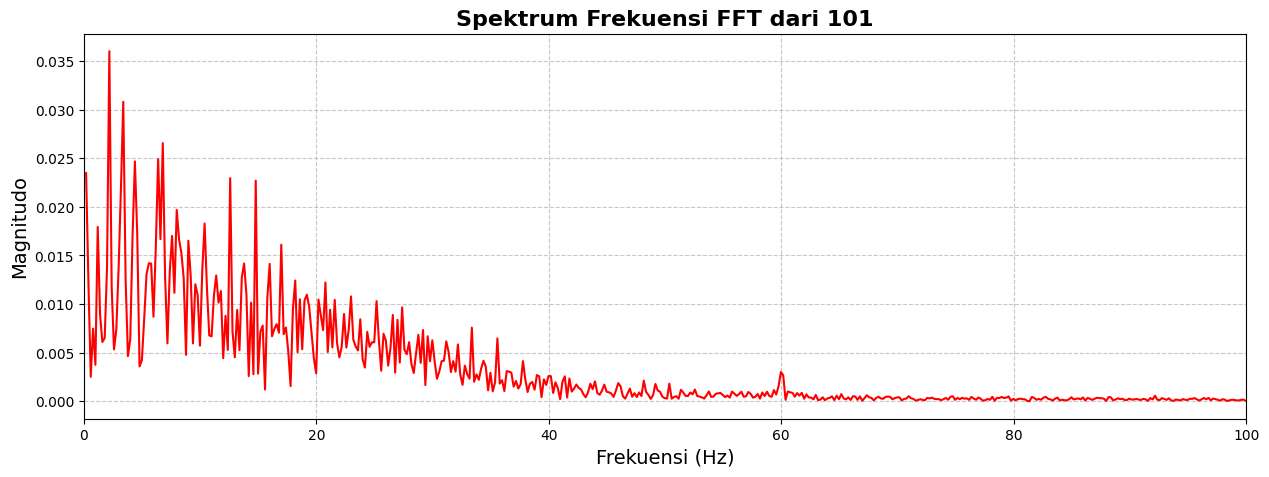

Membaca file: 102


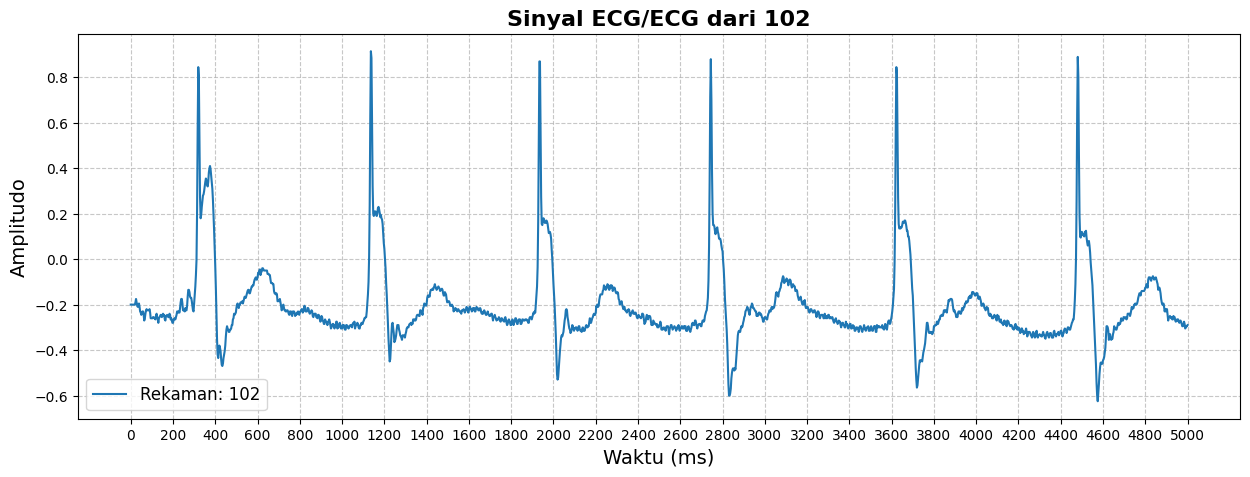

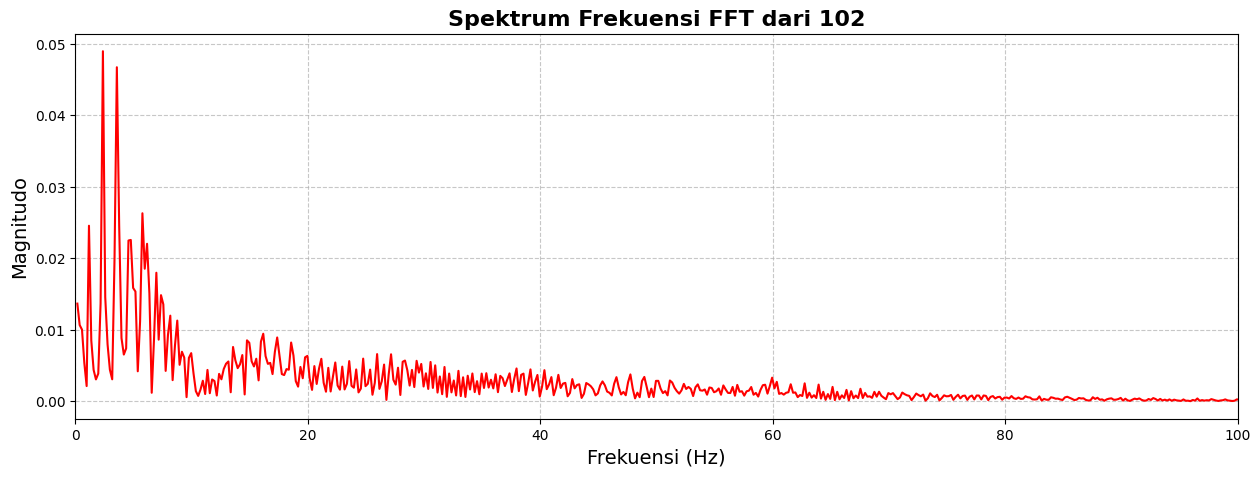

In [ ]:
from scipy.fft import fft, fftfreq
for record_name in record_files:
    print(f"Membaca file: {record_name}")

    # Membaca rekaman dan anotasi
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    annotation = wfdb.rdann(os.path.join(data_path, record_name), "atr")

    # Ambil data sinyal pertama
    signal = record.p_signal[:, 0]
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # detik ke milidetik

    # Filter hanya rentang 0 - 5000 ms
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # Visualisasi Sinyal dengan Waktu
    plt.figure(figsize=(15, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG/ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 200))
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # FFT (Fast Fourier Transform)
    N = len(signal)  # Jumlah sampel
    fft_values = fft(signal)  # FFT dari sinyal
    fft_magnitude = np.abs(fft_values) / N  # Normalisasi magnitudo FFT
    freqs = fftfreq(N, d=1/fs)  # Hitung sumbu frekuensi

    # hanya tampilkan frekuensi positif
    mask_freq = freqs > 0
    freqs = freqs[mask_freq]
    fft_magnitude = fft_magnitude[mask_freq]

    # visualisasi Spektrum Frekuensi
    plt.figure(figsize=(15, 5))
    plt.plot(freqs, fft_magnitude, color='red', linewidth=1.5)
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("Magnitudo", fontsize=14)
    plt.title(f"Spektrum Frekuensi FFT dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 100])  # Fokus pada 0-100 Hz
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Batasi jumlah file yang divisualisasikan**
    if record_files.index(record_name) >= 2:  # tampilkan 3 file pertama
        break

 ### Periodogram Power Spectral Density

Membaca file: 100


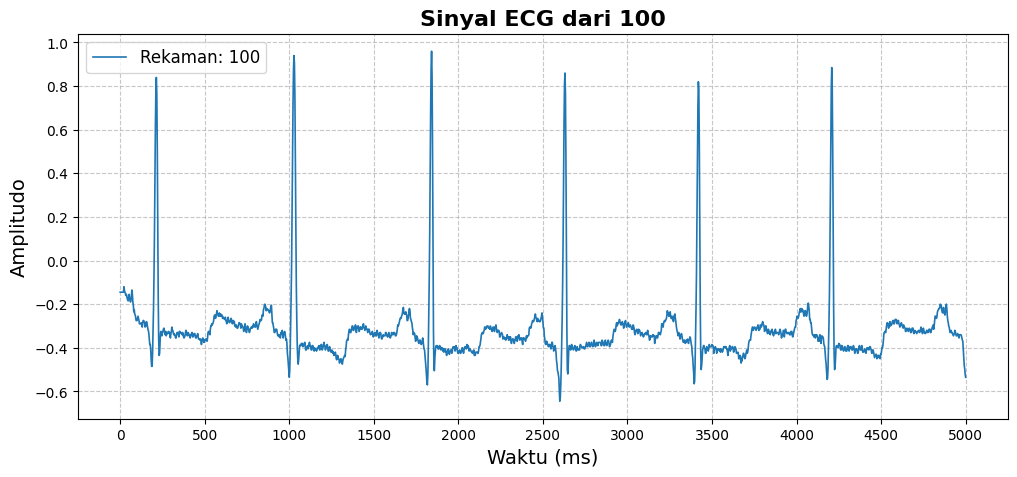

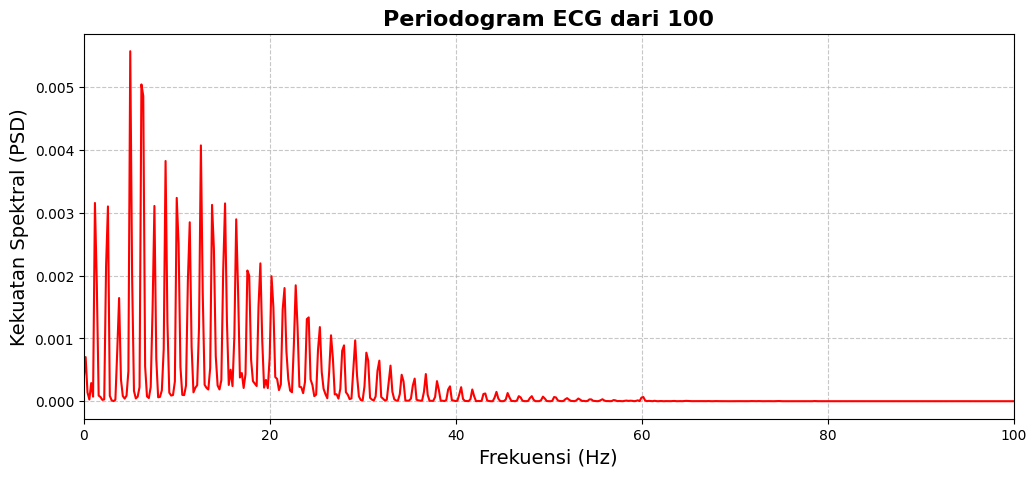

Membaca file: 101


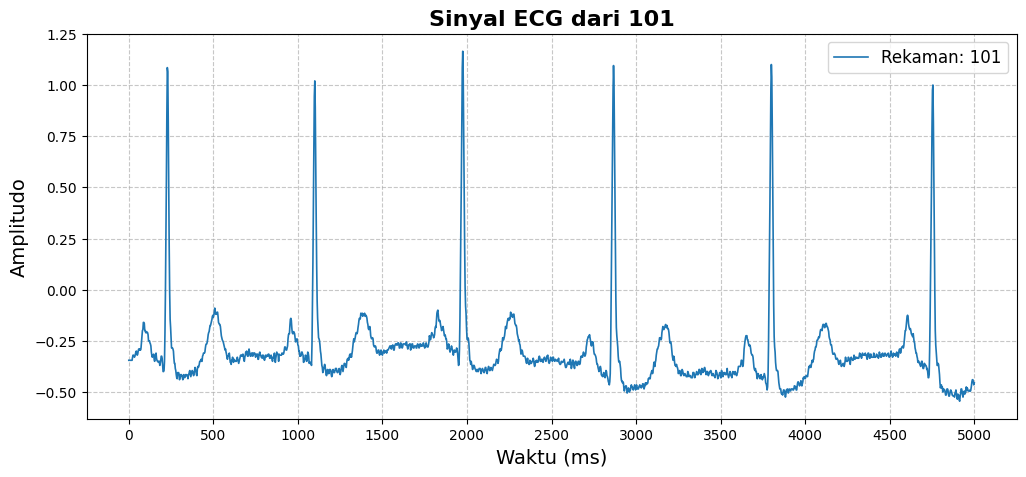

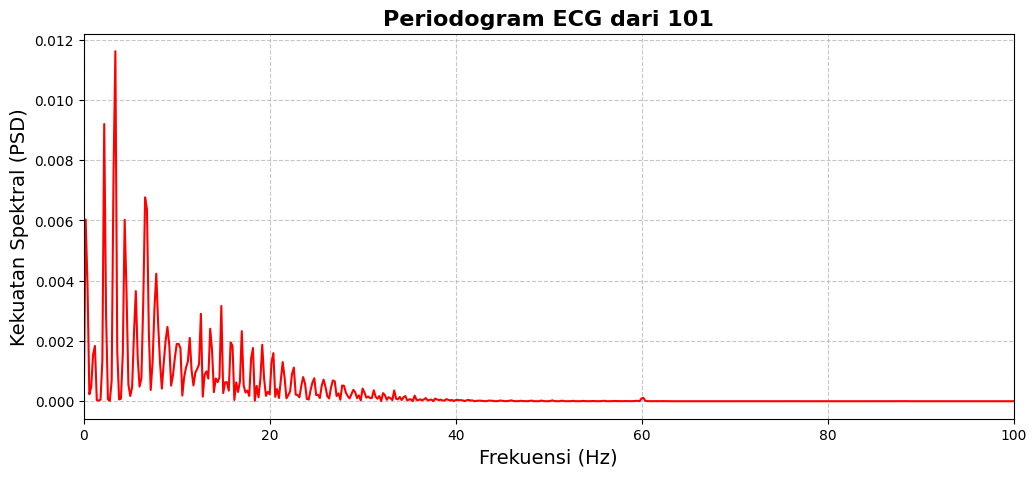

Membaca file: 102


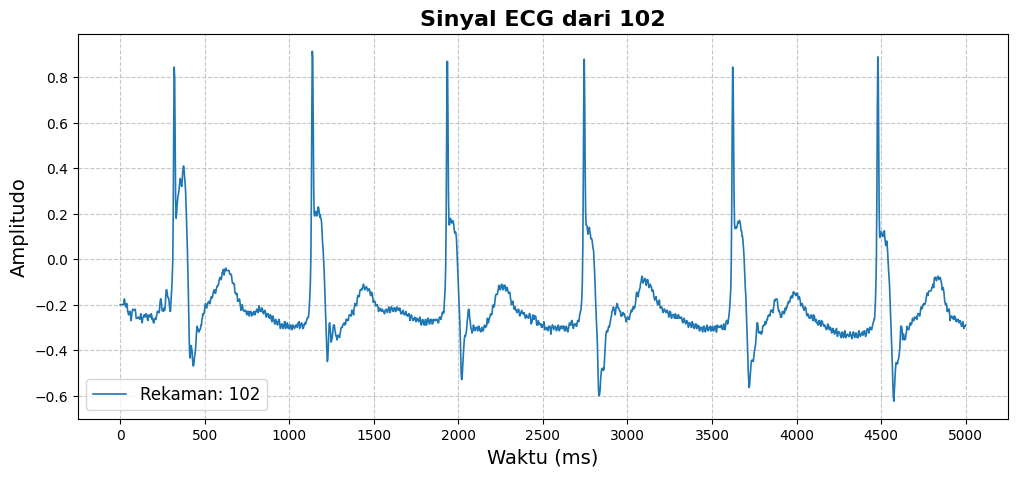

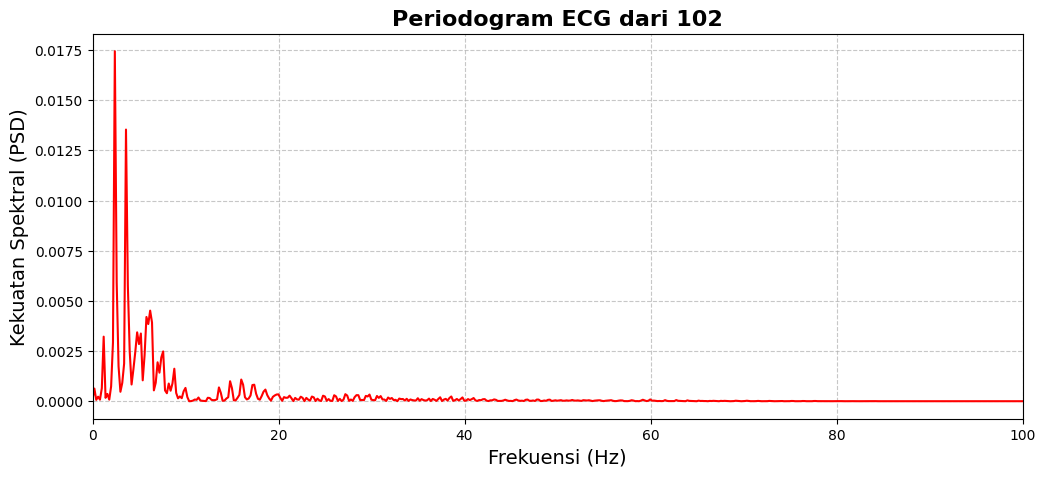

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from google.colab import drive


# Loop untuk memproses beberapa file
for record_name in record_files[:3]:  # Batasi hanya 3 file pertama
    print(f"Membaca file: {record_name}")

    # **Baca rekaman**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]  # Ambil sinyal kanal pertama
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal ECG**
    plt.figure(figsize=(12, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.2)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 500))
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **PERIODOGRAM menggunakan metode Welch**
    freqs, Pxx = periodogram(signal, fs, window="hamming", scaling="density")

    # **Visualisasi Periodogram**
    plt.figure(figsize=(12, 5))
    plt.plot(freqs, Pxx, color='red', linewidth=1.5)
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("Kekuatan Spektral (PSD)", fontsize=14)
    plt.title(f"Periodogram ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 100])  # Fokus pada 0-100 Hz
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()


### Welch Power Spectral Density

Membaca file: 100


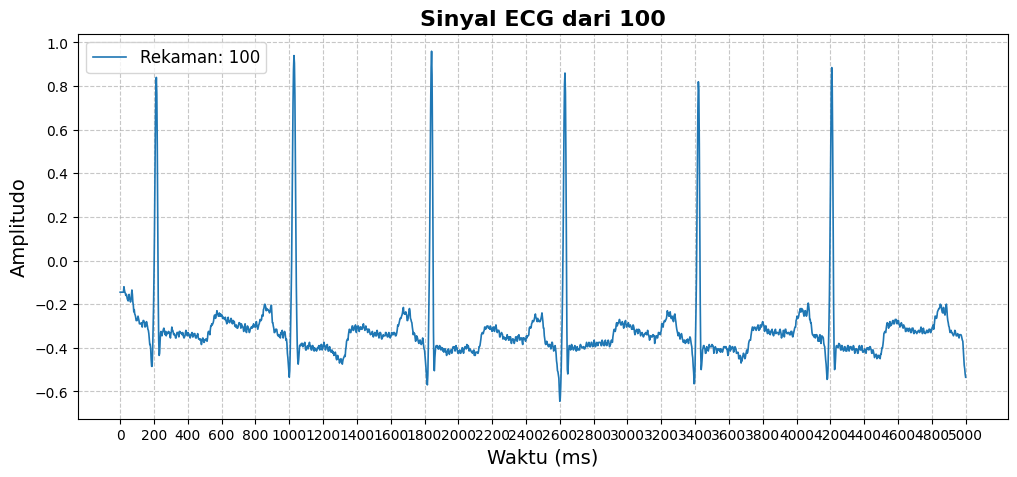

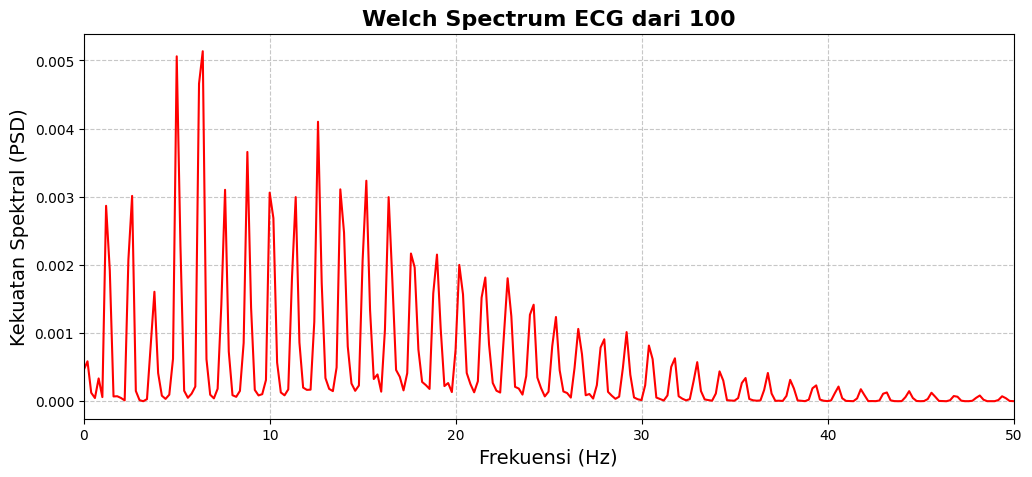

Membaca file: 101


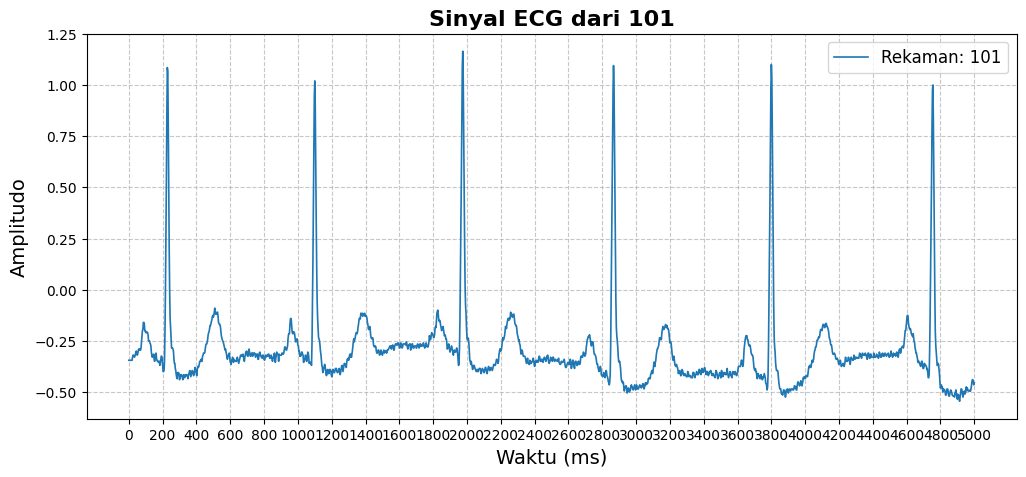

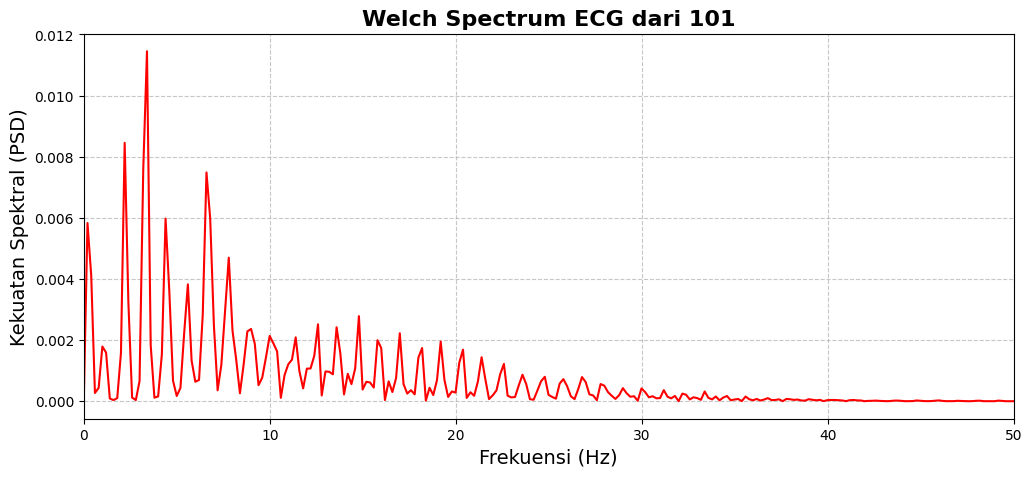

Membaca file: 102


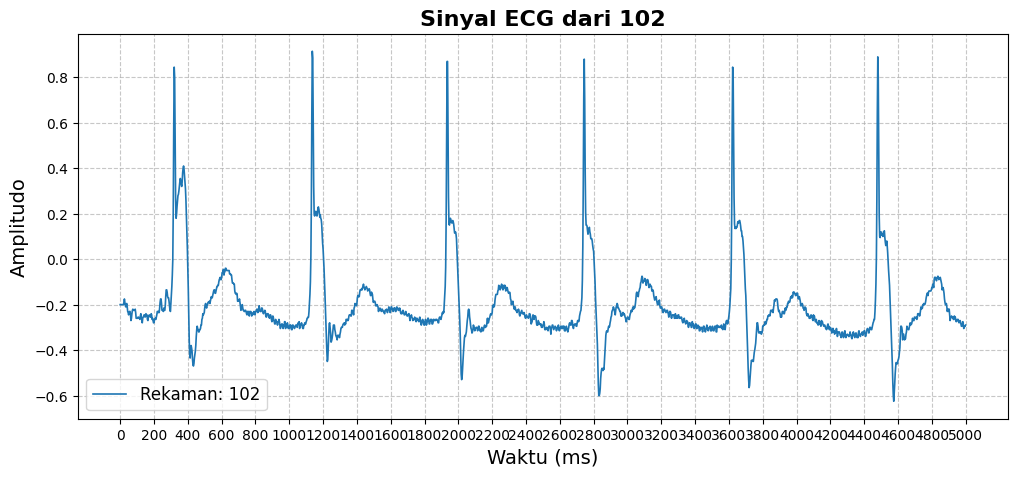

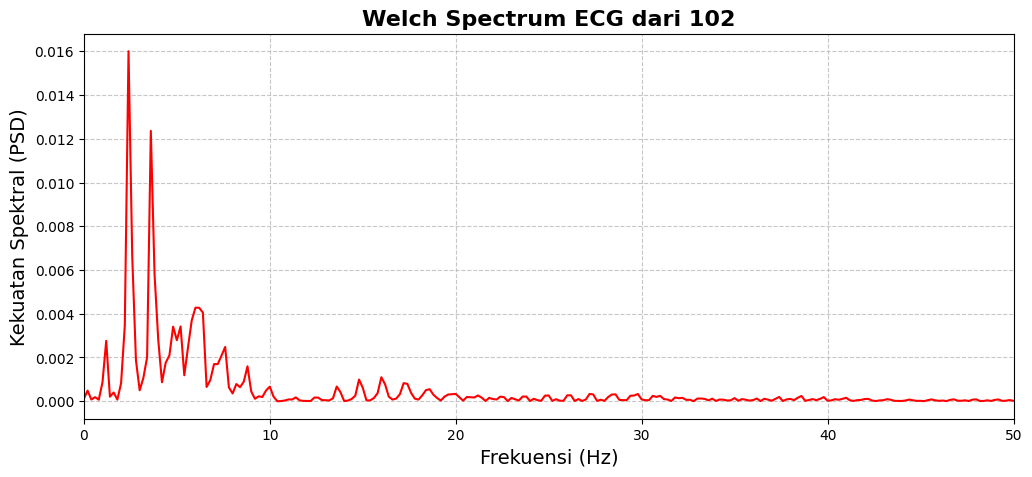

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from scipy.signal import welch
from google.colab import drive

# Path ke dataset MIT-BIH di Google Drive
data_path = "/content/drive/MyDrive/Colab Notebooks/mit-bih-arrhythmia-dataset/"

# Ambil semua file rekaman (tanpa ekstensi)
record_files = sorted([f[:-4] for f in os.listdir(data_path) if f.endswith(".dat")])

# Loop untuk memproses beberapa file
for record_name in record_files[:3]:  # Batasi hanya 3 file pertama
    print(f"Membaca file: {record_name}")

    # **Baca rekaman**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]  # Ambil sinyal kanal pertama
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal ECG**
    plt.figure(figsize=(12, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.2)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 200))
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **WELCH SPECTRUM**
    segment_length = len(signal)  # Panjang segmen
    noverlap = segment_length // 4  # Overlap 25%
    freqs, Pxx = welch(signal, fs, nperseg=segment_length, noverlap=noverlap, scaling="density")

    # **Visualisasi Welch Spectrum**
    plt.figure(figsize=(12, 5))
    plt.plot(freqs, Pxx, color='red', linewidth=1.5)
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("Kekuatan Spektral (PSD)", fontsize=14)
    plt.title(f"Welch Spectrum ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 50])  # Fokus pada 0-50 Hz
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()


### Yule-Walker AR Modeling

In [ ]:
!pip install spectrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 16.4 MB/s eta 0:00:00
  Created wheel for spectrum: filename=spectrum-0.9.0-cp311-cp311-linux_x86_64.whl size=236750 sha256=1cd7d233d9b99b193e95e68378294549bbf2155afe5677eefa5ead54de1df1f8
  Stored in directory: /root/.cache/pip/wheels/c0/9c/de/eb558fbd03ea1540d3c908f23681f57f9d9e8c2a5cd08d6f42
Successfully built spectrum


Membaca file: 100


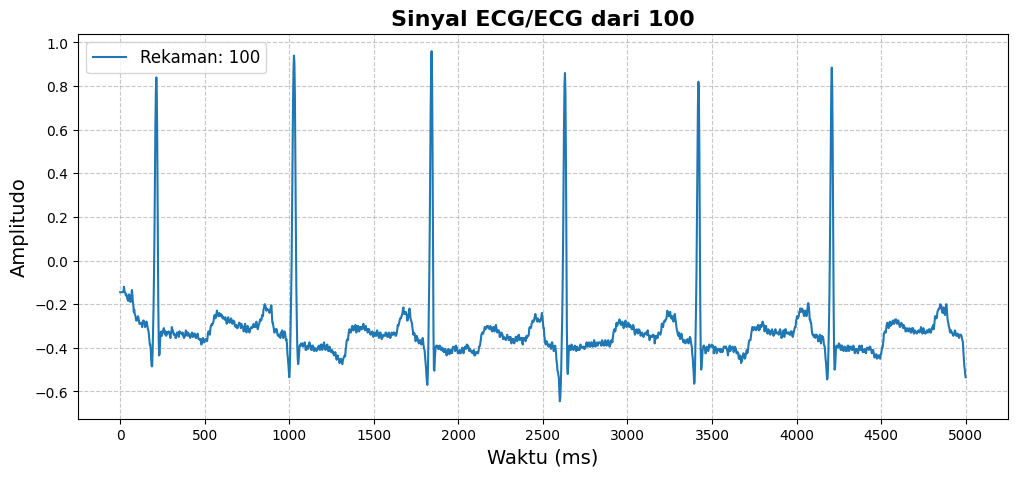

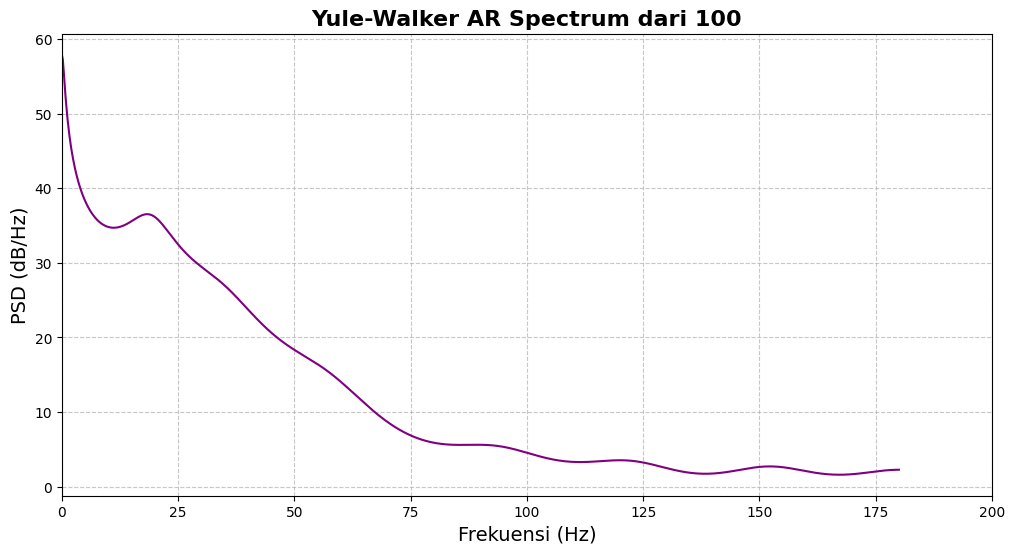

Membaca file: 101


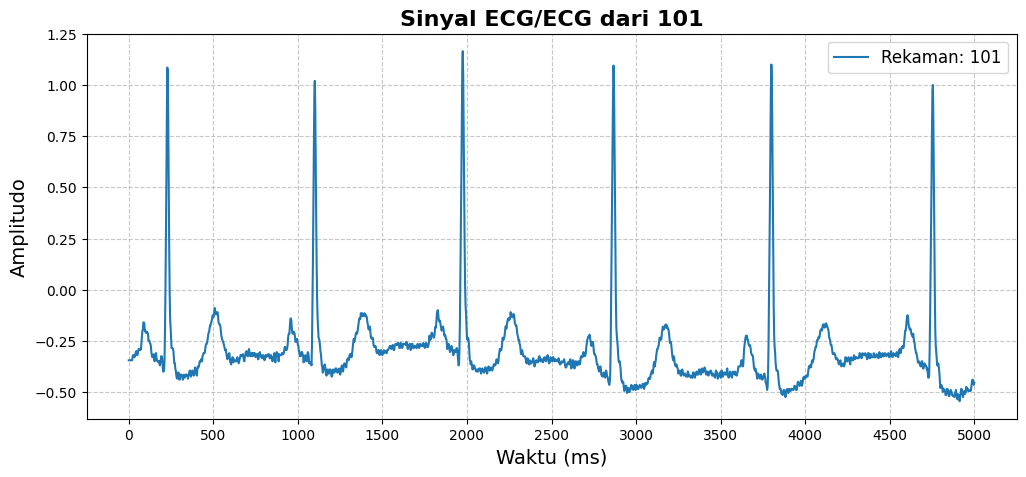

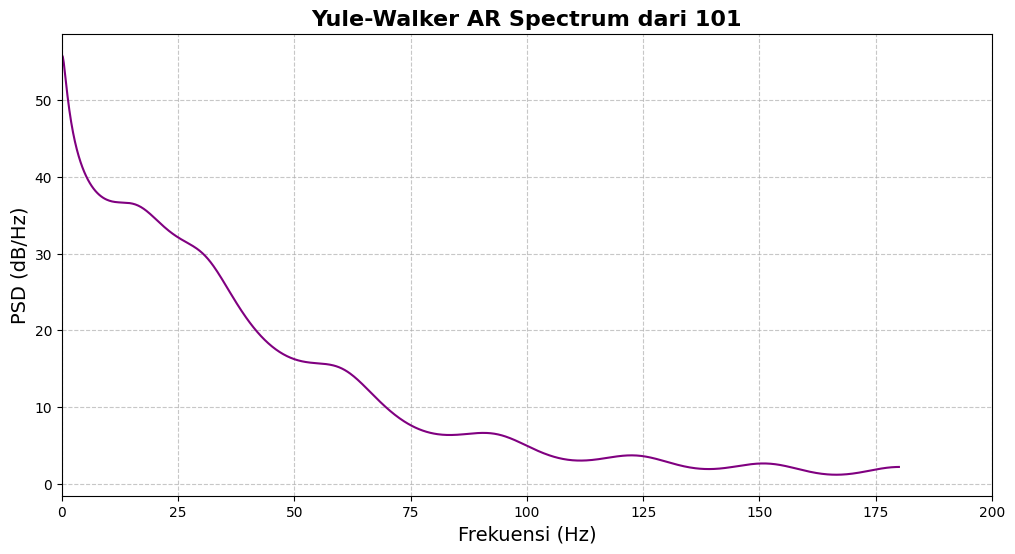

Membaca file: 102


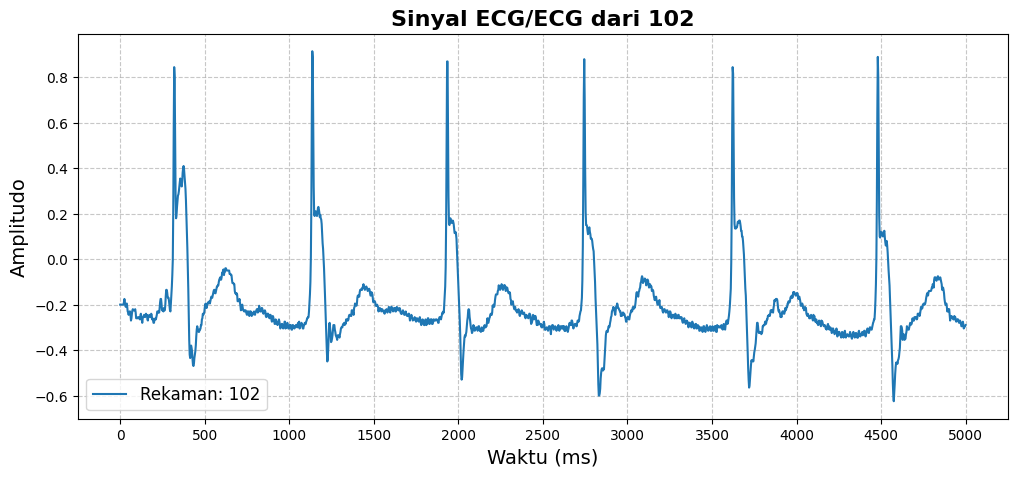

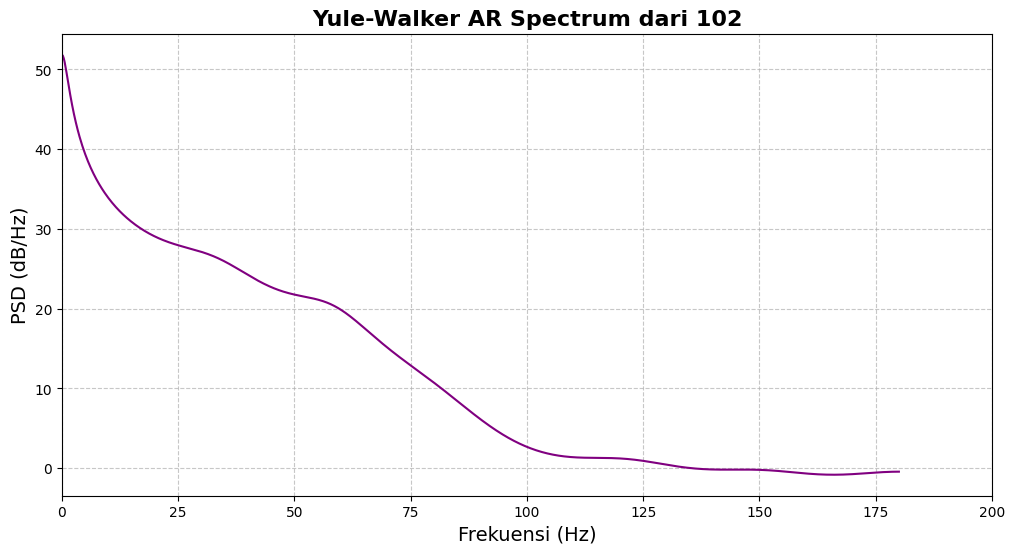

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from spectrum import pyule


# Loop untuk memproses beberapa file
for record_name in record_files[:3]:  # Batasi hanya 3 file pertama
    print(f"Membaca file: {record_name}")

    # **Baca rekaman**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]  # Ambil sinyal kanal pertama
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # Filter hanya rentang 0 - 5000 ms
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal ECG/ECG**
    plt.figure(figsize=(12, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG/ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 500))
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **YULE-WALKER AR SPECTRUM**
    order = 14  # Orde AR
    pyule_obj = pyule(signal, order)
    Pxx = pyule_obj.psd  # Spektrum daya
    freqs = np.linspace(0, fs / 2, len(Pxx))  # Sumbu frekuensi

    # **Visualisasi Yule-Walker AR Spectrum**
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, 10 * np.log10(Pxx), color='purple', linewidth=1.5)
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("PSD (dB/Hz)", fontsize=14)
    plt.title(f"Yule-Walker AR Spectrum dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 200])  # Fokus pada 0-200 Hz
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 2:  # Tampilkan 3 file pertama
        break


### Covariance Method

Memproses file: 100


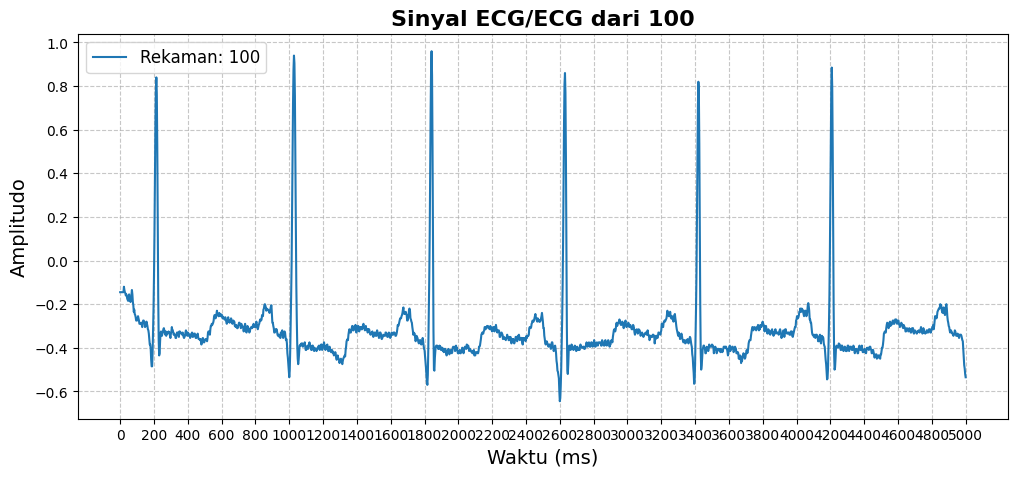

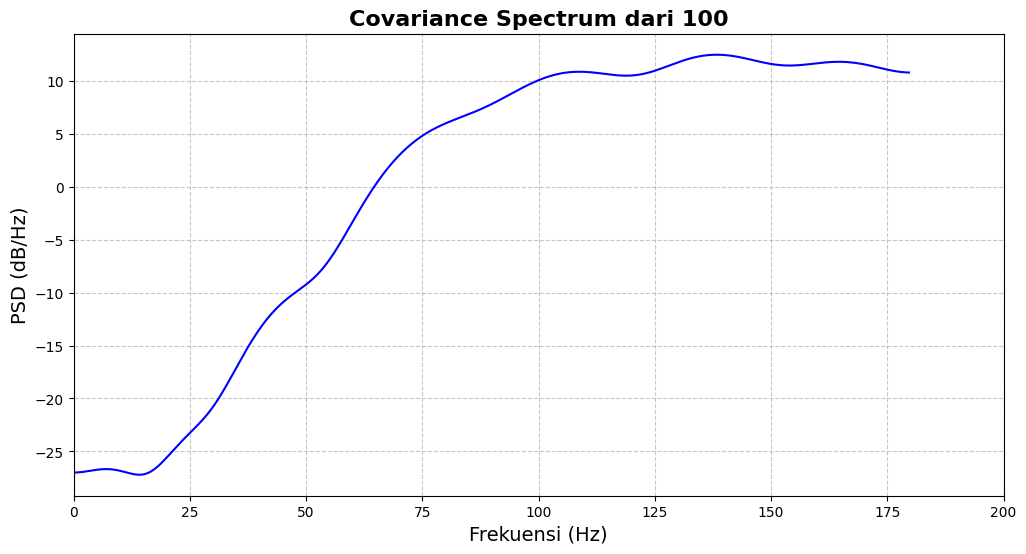

Memproses file: 101


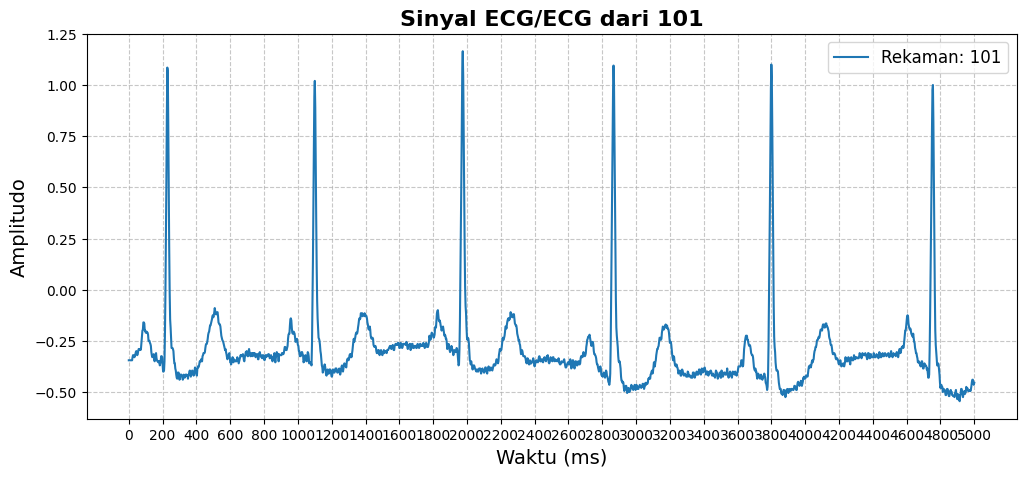

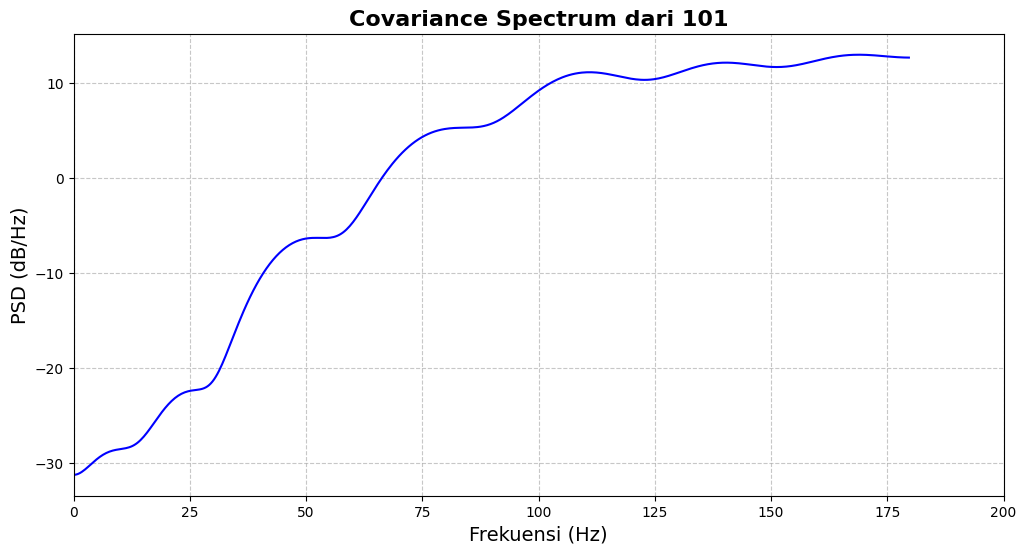

Memproses file: 102


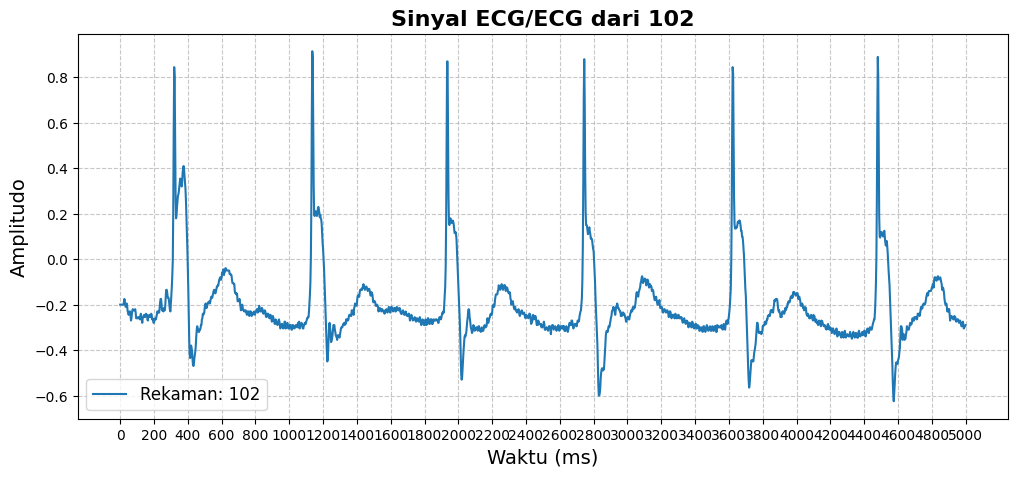

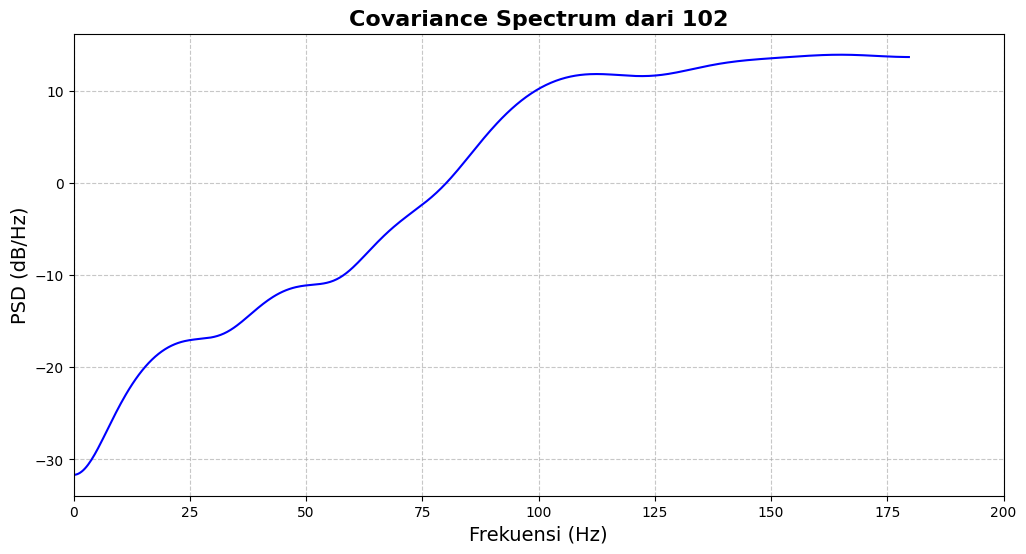

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg



# Loop melalui beberapa file ECG/ECG
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # Membaca rekaman
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # Ambil sinyal pertama
    signal = record.p_signal[:, 0]
    fs = record.fs  # Frekuensi sampling
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # Filter hanya rentang 0 - 5000 ms
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal ECG/ECG**
    plt.figure(figsize=(12, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG/ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 200))
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Covariance Spectrum menggunakan AutoReg dari statsmodels**
    order = 14  # Orde AR (Covariance)
    model = AutoReg(signal, lags=order, old_names=False).fit()
    ar_coeffs = np.r_[1, -model.params[1:]]  # Koefisien AR

    # **Hitung PSD dari model AR**
    psd = np.abs(np.fft.fft(ar_coeffs, 1024)) ** 2  # Power Spectrum
    freqs = np.fft.fftfreq(1024, d=1/fs)  # Sumbu frekuensi
    mask_freq = freqs > 0  # Hanya ambil frekuensi positif

    # **Visualisasi Covariance Spectrum**
    plt.figure(figsize=(12, 6))
    plt.plot(freqs[mask_freq], 10 * np.log10(psd[mask_freq]), color='blue', linewidth=1.5)
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("PSD (dB/Hz)", fontsize=14)
    plt.title(f"Covariance Spectrum dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 200])
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 2:  # Tampilkan 3 file pertama
        break


### Modified Covariance Method

Memproses file: 100


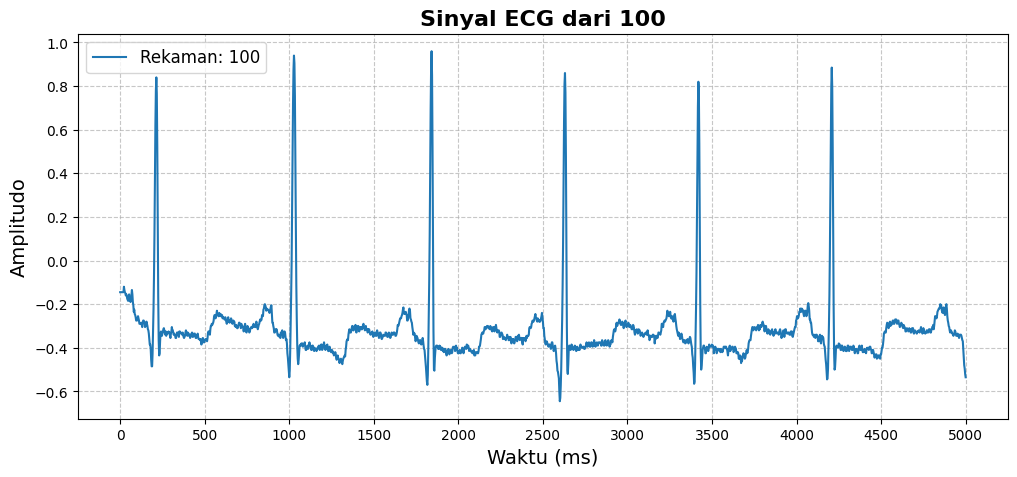

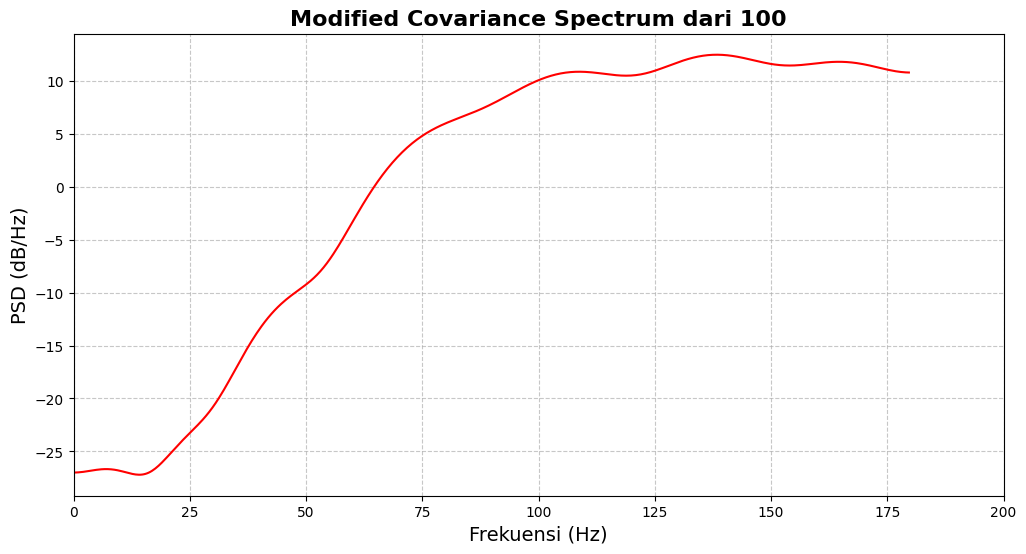

Memproses file: 101


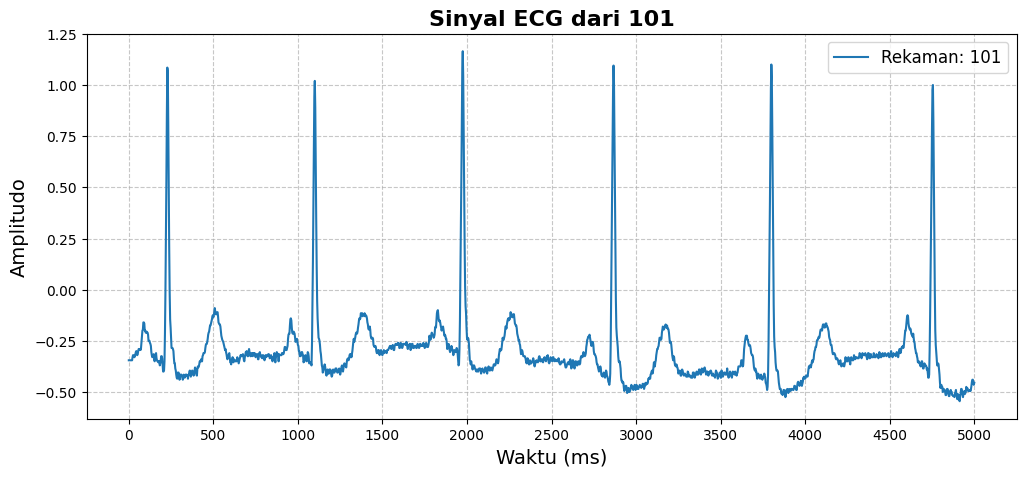

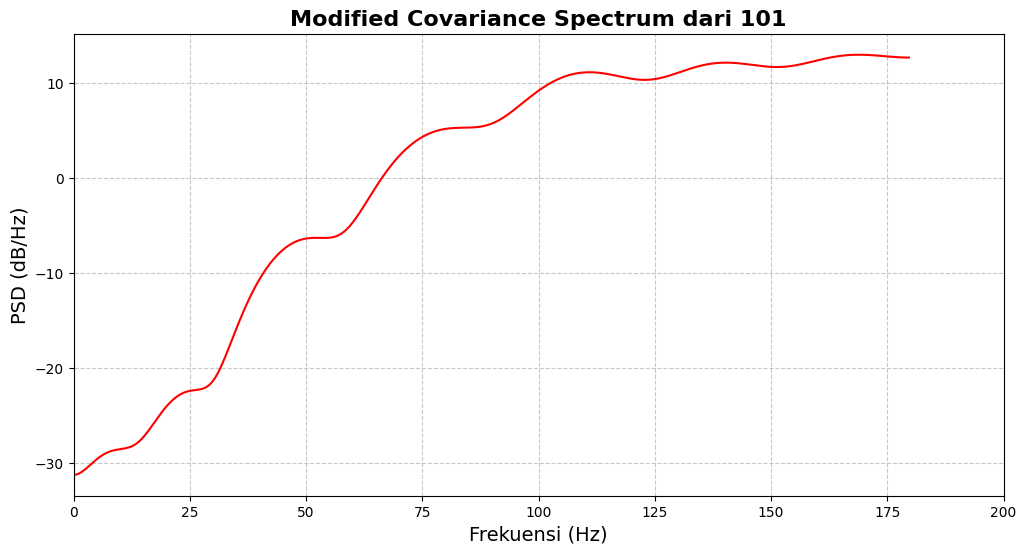

Memproses file: 102


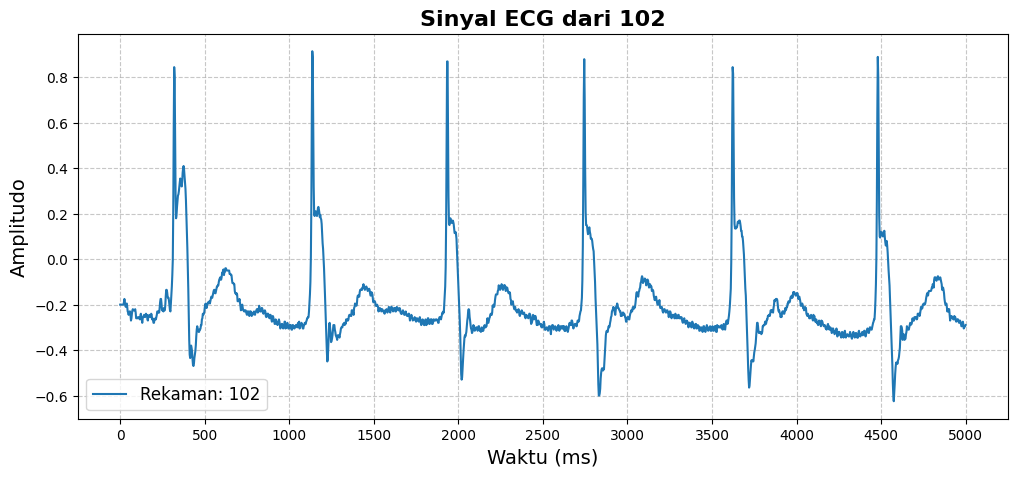

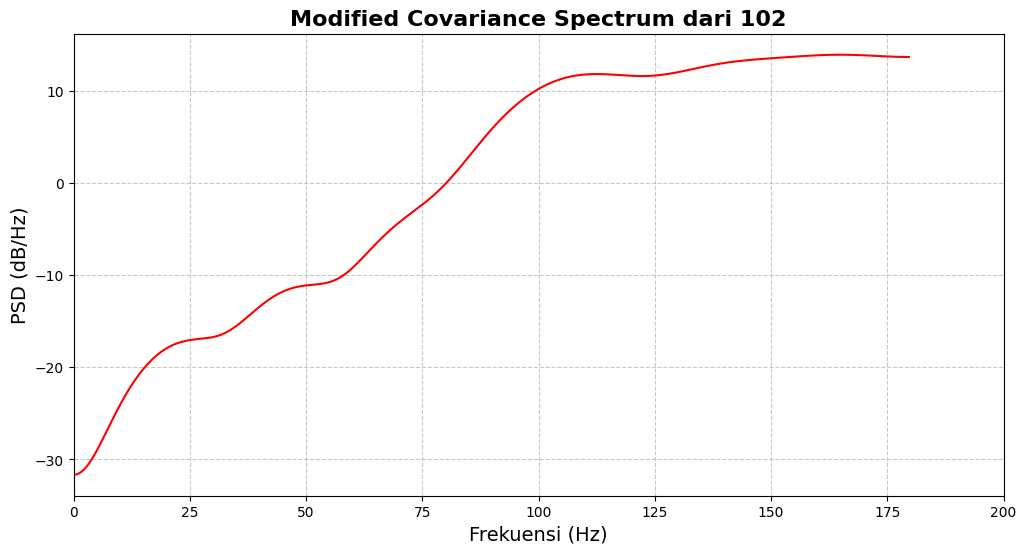

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Loop melalui beberapa file ECG
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # Membaca rekaman ECG
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # Ambil sinyal pertama
    signal = record.p_signal[:, 0]
    fs = record.fs  # Frekuensi sampling
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # Filter hanya rentang 0 - 5000 ms
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal ECG**
    plt.figure(figsize=(12, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 500))
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Modified Covariance Spectrum (pmcov)**
    order = 14  # Orde AR (Modified Covariance)
    model = AutoReg(signal, lags=order, old_names=False).fit()
    ar_coeffs = np.r_[1, -model.params[1:]]  # Koefisien AR

    # **Hitung PSD dari model AR**
    psd = np.abs(np.fft.fft(ar_coeffs, 1024)) ** 2  # Power Spectrum
    freqs = np.fft.fftfreq(1024, d=1/fs)  # Sumbu frekuensi
    mask_freq = freqs > 0  # Hanya ambil frekuensi positif

    # **Visualisasi Modified Covariance Spectrum**
    plt.figure(figsize=(12, 6))
    plt.plot(freqs[mask_freq], 10 * np.log10(psd[mask_freq]), color='red', linewidth=1.5)
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("PSD (dB/Hz)", fontsize=14)
    plt.title(f"Modified Covariance Spectrum dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 200])  # Fokus pada 0-200 Hz
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 2:  # Tampilkan 3 file pertama
        break


### Burg Method

Memproses file: 100


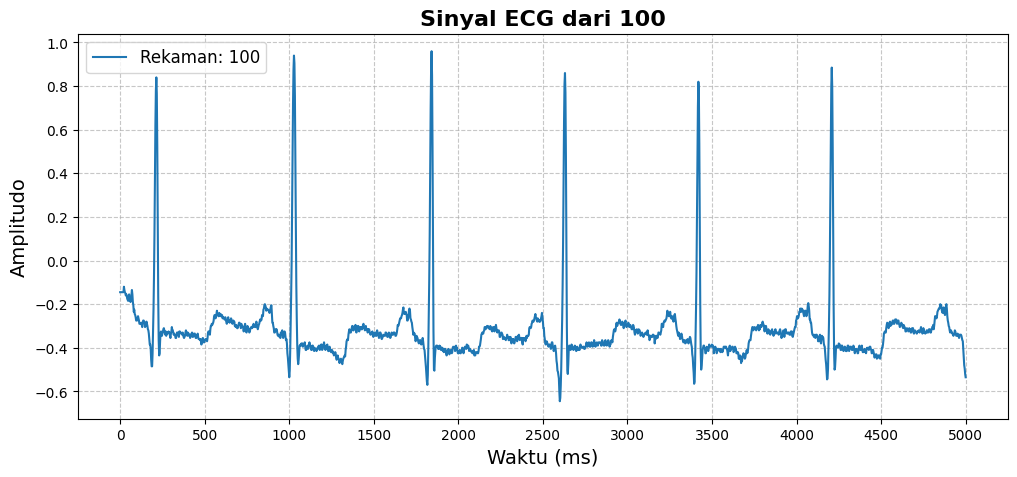

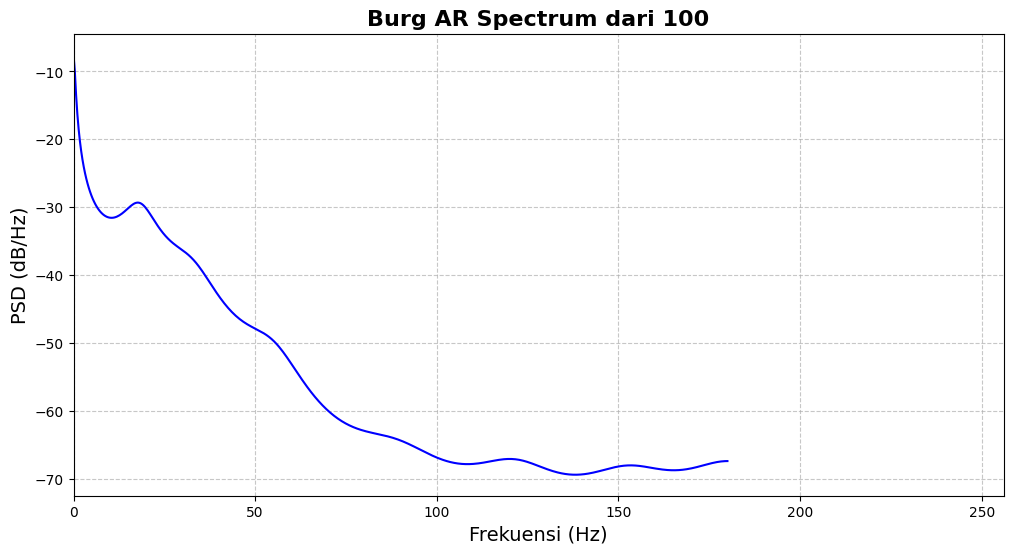

Memproses file: 101


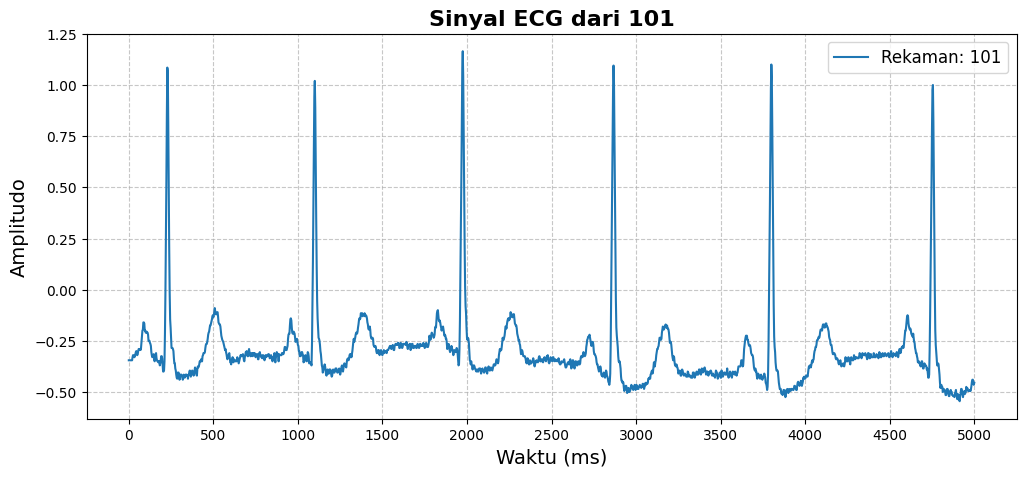

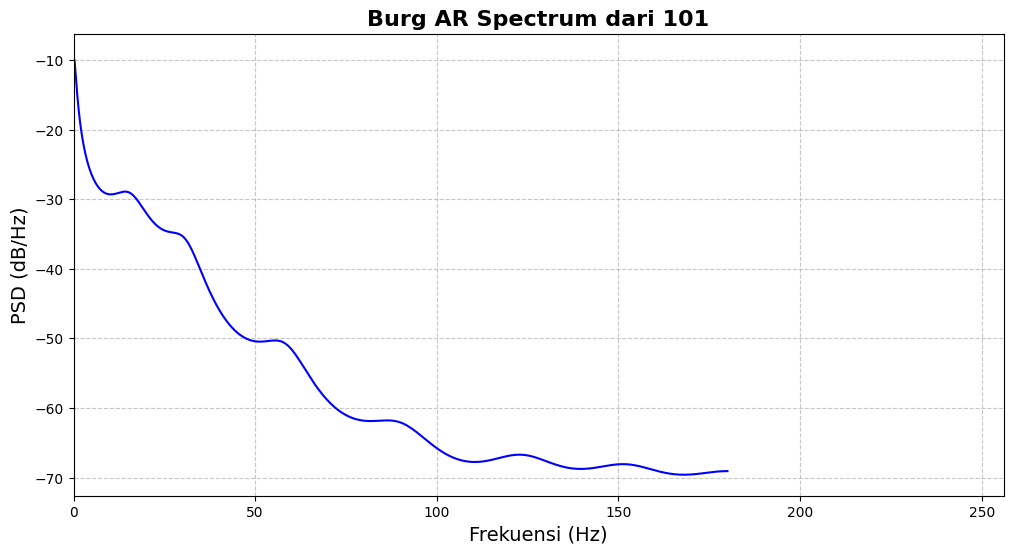

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from spectrum.burg import pburg  # Menggunakan pburg untuk Burg Spectrum


# Loop melalui beberapa file ECG
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # Membaca rekaman ECG
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # Ambil sinyal pertama
    signal = record.p_signal[:, 0]
    fs = record.fs  # Frekuensi sampling
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # Filter hanya rentang 0 - 5000 ms
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal ECG**
    plt.figure(figsize=(12, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 500))
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Burg AR Spectrum**
    order = 14  # Orde AR
    burg_result = pburg(signal, order, NFFT=1024, sampling=fs)
    pxx = burg_result.psd  # Spektrum daya
    freqs = burg_result.frequencies()  # Frekuensi

    # **Visualisasi Burg Spectrum**
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, 10 * np.log10(pxx), color='blue', linewidth=1.5)
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("PSD (dB/Hz)", fontsize=14)
    plt.title(f"Burg AR Spectrum dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 256])  # Fokus pada 0-256 Hz
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 1:  # Tampilkan 2 file pertama
        break


## Subspace-Based Methods for Spectral Analysis

### Music Modeling

Memproses file: 100


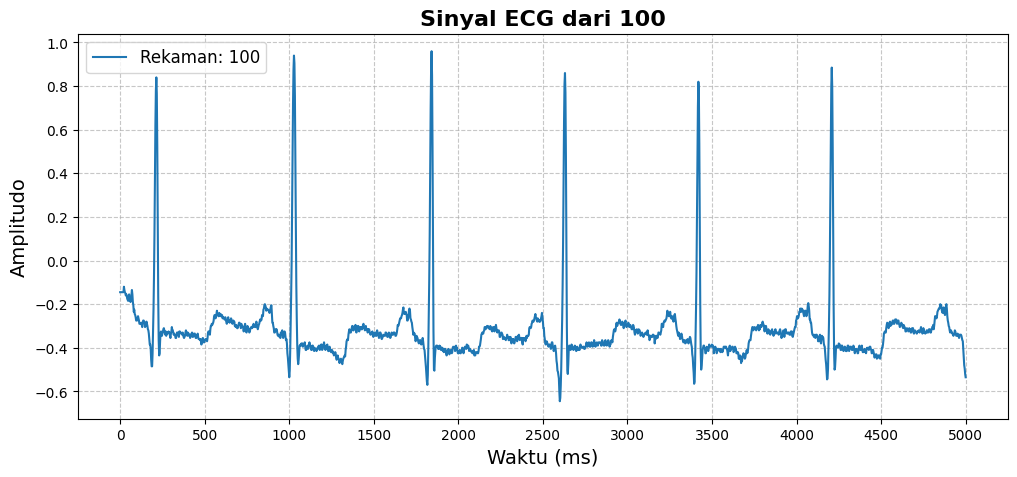

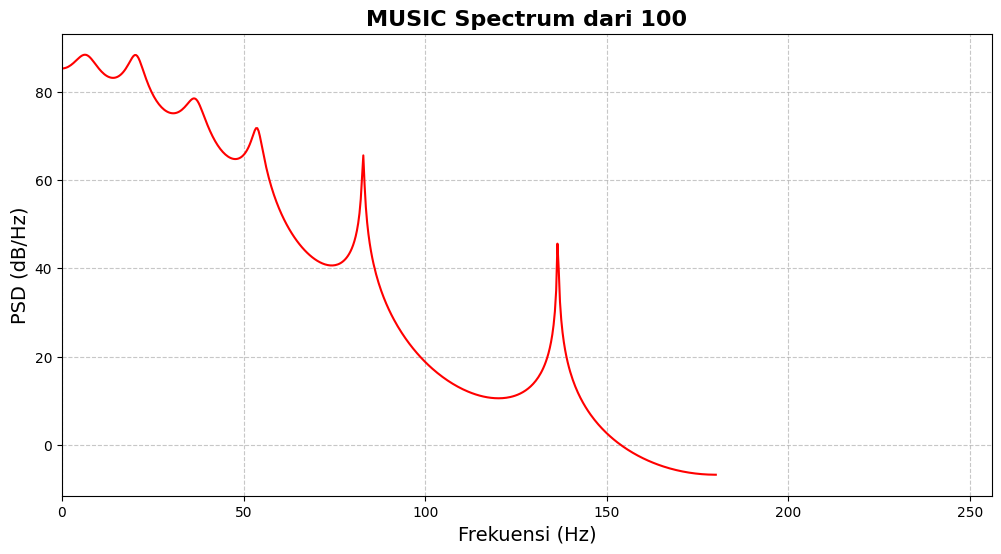

Memproses file: 101


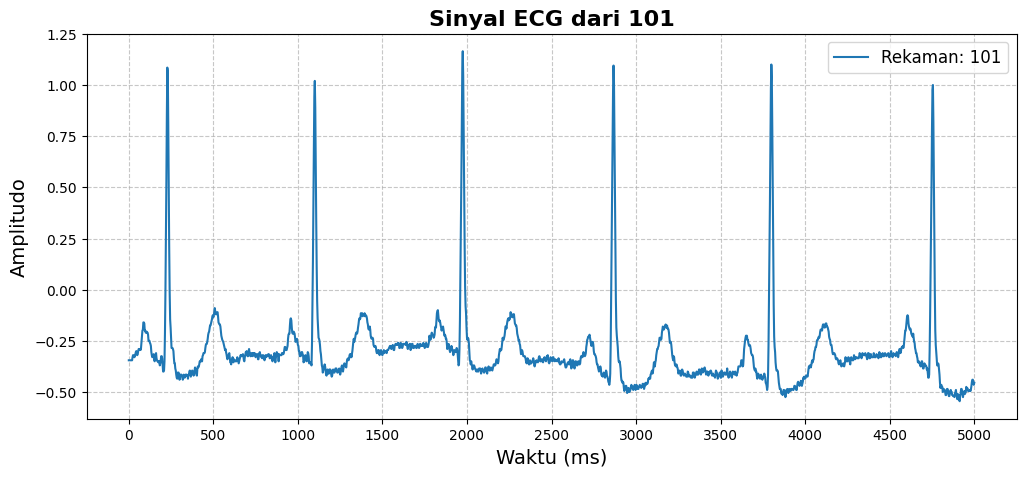

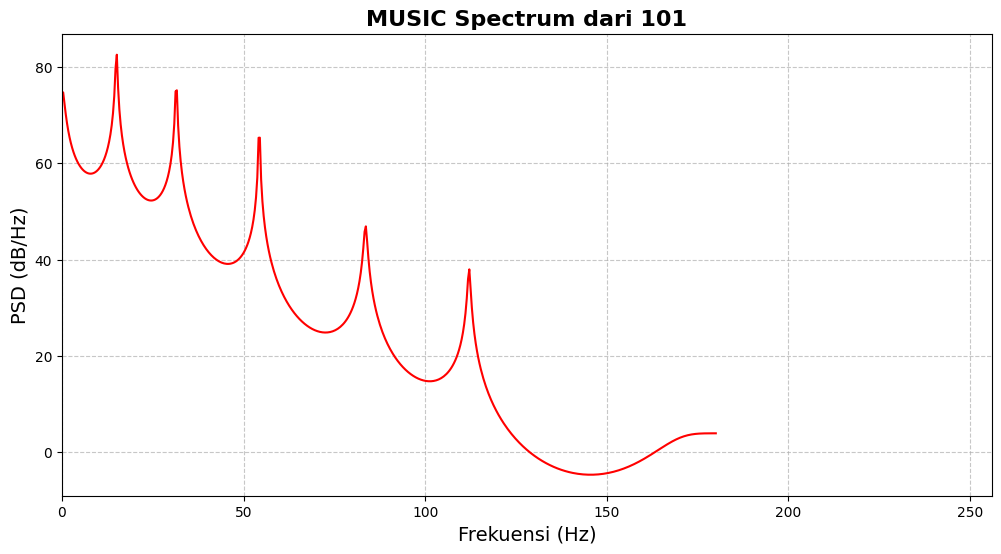

Memproses file: 102


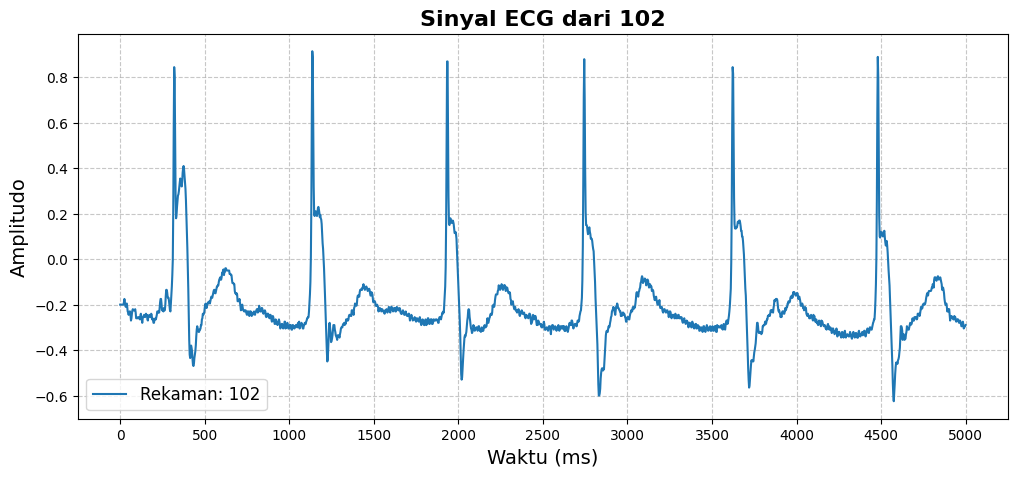

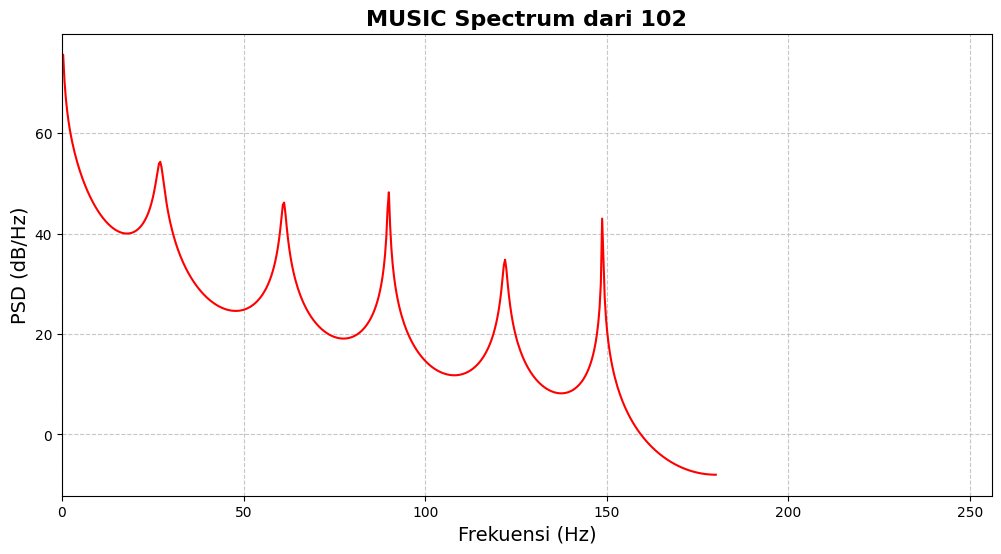

Memproses file: 103


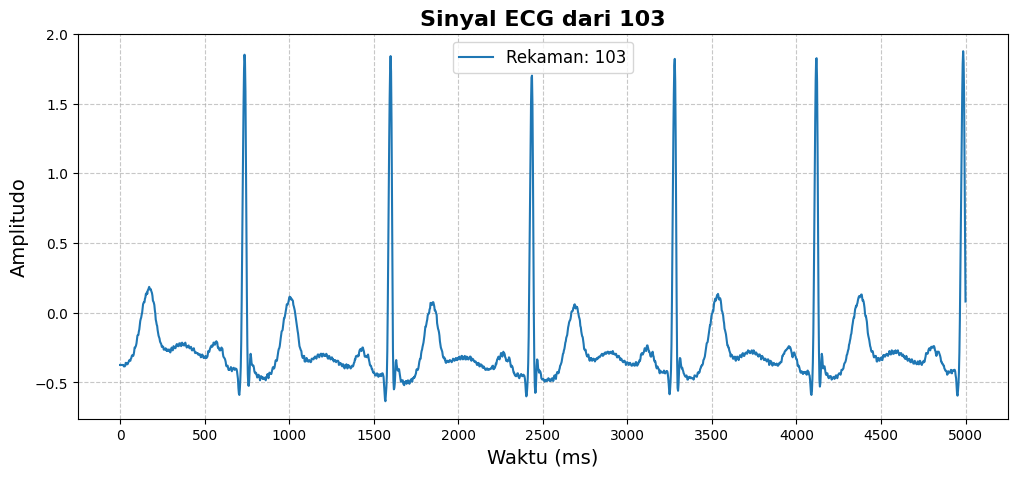

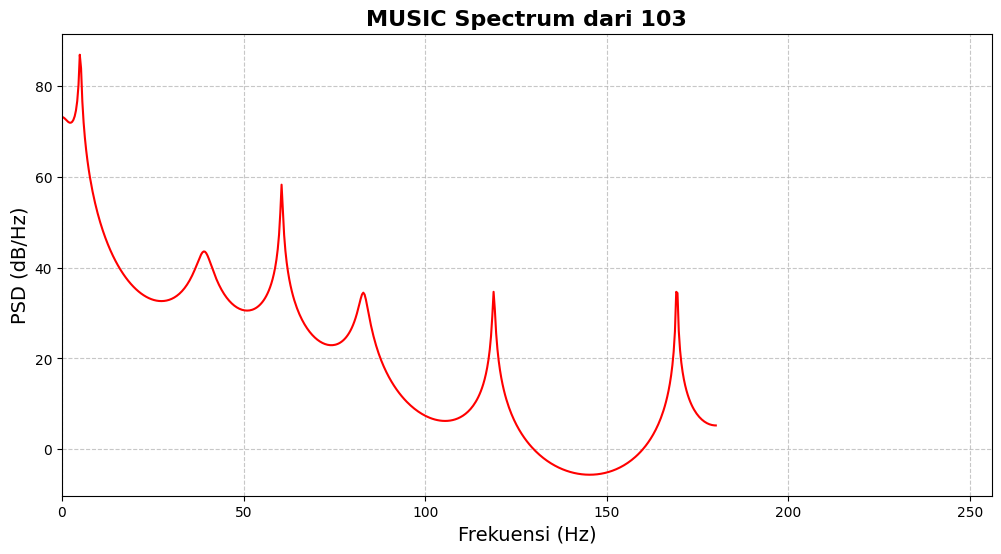

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from spectrum import pmusic  # Algoritma MUSIC untuk spektrum


# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Membaca rekaman ECG**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # **Ambil sinyal pertama**
    signal = record.p_signal[:, 0]
    fs = record.fs  # Frekuensi sampling
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal ECG**
    plt.figure(figsize=(12, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 500))
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **MUSIC Spectrum**
    order = 14  # Orde model MUSIC
    nfft = 1024  # Resolusi frekuensi
    music_result = pmusic(signal, order, NFFT=nfft, sampling=fs)
    pxx = music_result.psd  # Spektrum daya
    freqs = music_result.frequencies()  # Frekuensi

    # **Visualisasi MUSIC Spectrum**
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, 10 * np.log10(pxx), color='red', linewidth=1.5)
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("PSD (dB/Hz)", fontsize=14)
    plt.title(f"MUSIC Spectrum dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 256])  # Fokus pada 0-256 Hz
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 3:  # Tampilkan 2 file pertama
        break


### Eigenvector Modeling

Memproses file: 100


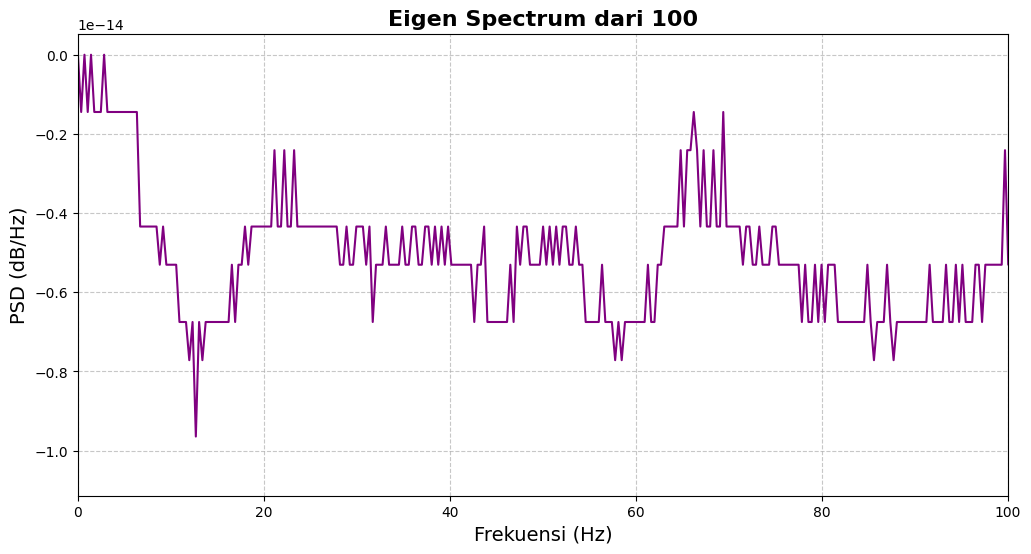

Memproses file: 101


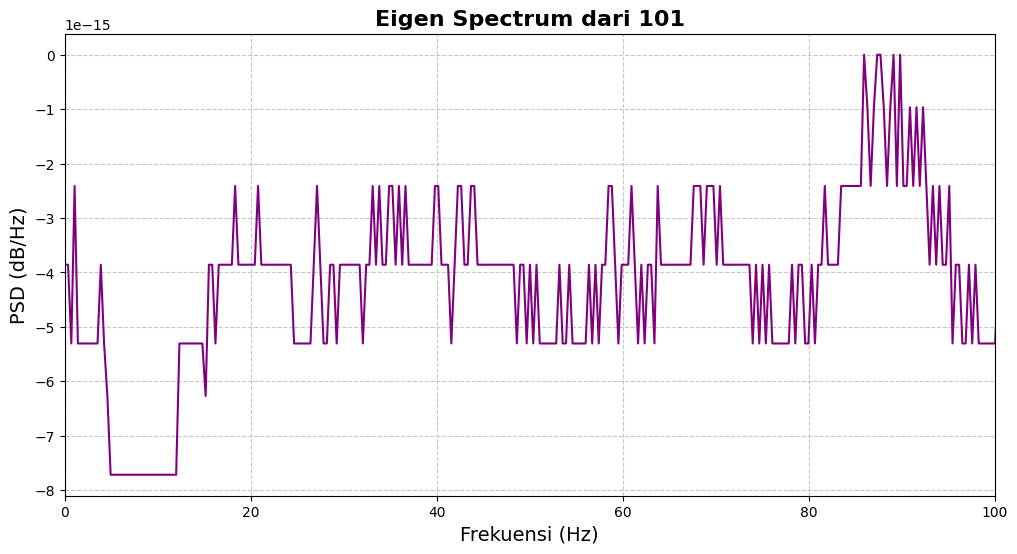

Memproses file: 102


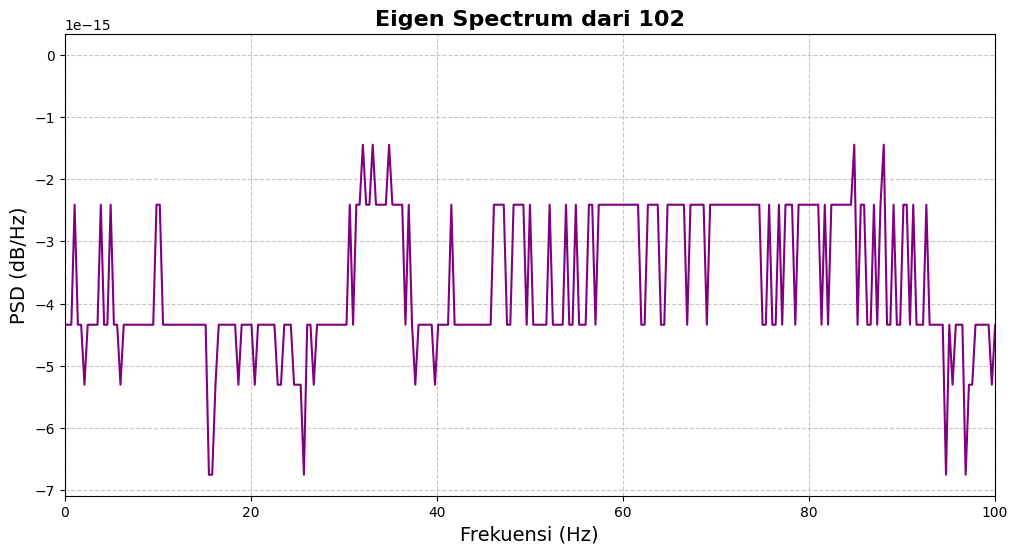

Memproses file: 103


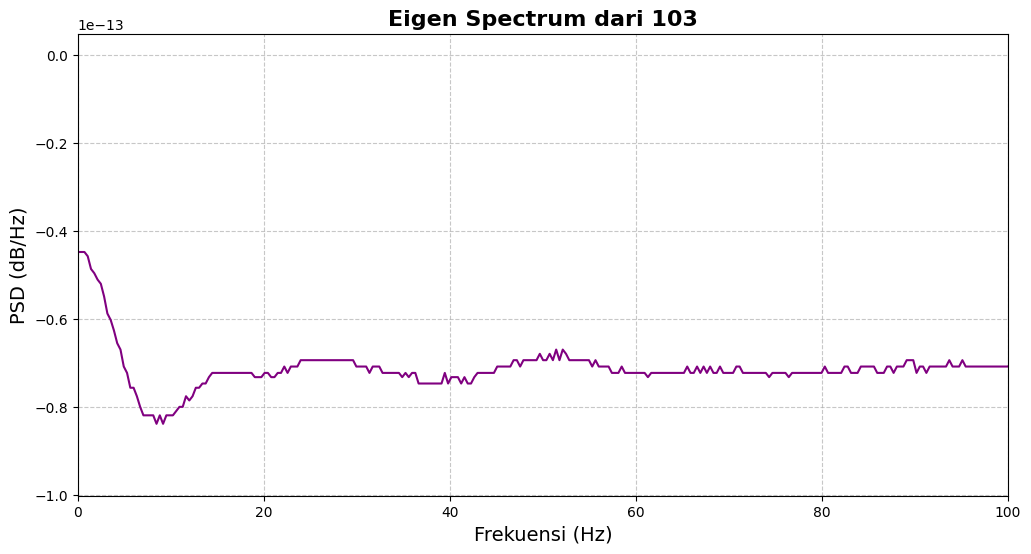

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from scipy.linalg import eigh

Fs = 360  # Frekuensi sampling dataset MIT-BIH
order = 35  # Orde model
NFFT = 1024  # Resolusi FFT

# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Membaca rekaman ECG**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # **Ambil sinyal pertama**
    signal = record.p_signal[:, 0]
    time_ms = (np.arange(len(signal)) / Fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Bentuk matriks kovarians Toeplitz**
    X = np.lib.stride_tricks.sliding_window_view(signal, order)
    R = np.cov(X, rowvar=False)

    # **Eigen Decomposition**
    eigenvalues, eigenvectors = eigh(R)

    # **Ambil eigenvector dengan eigenvalue terkecil (subruang noise)**
    noise_eigenvectors = eigenvectors[:, :order]

    # **Hitung spektrum eigenvector**
    freqs = np.linspace(0, Fs / 2, NFFT // 2)
    psd = np.zeros(len(freqs))

    for f in range(len(freqs)):
        v = np.exp(-2j * np.pi * freqs[f] * np.arange(order) / Fs)
        psd[f] = 1 / np.linalg.norm(noise_eigenvectors.T @ v) ** 2

    psd = psd / np.max(psd)  # Normalisasi spektrum

    # **Visualisasi Eigen Spectrum**
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, 10 * np.log10(psd), linewidth=1.5, color="purple")
    plt.xlabel("Frekuensi (Hz)", fontsize=14)
    plt.ylabel("PSD (dB/Hz)", fontsize=14)
    plt.title(f"Eigen Spectrum dari {record_name}", fontsize=16, fontweight="bold")
    plt.xlim([0, 100])  # Fokus pada 0-100 Hz
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()
    if record_files.index(record_name) >= 3:  # Tampilkan 4 file pertama
        break


## Time-Frequency Analysis

### Short-Time Fourier Transform: The Spectrogram


Memproses file: 100


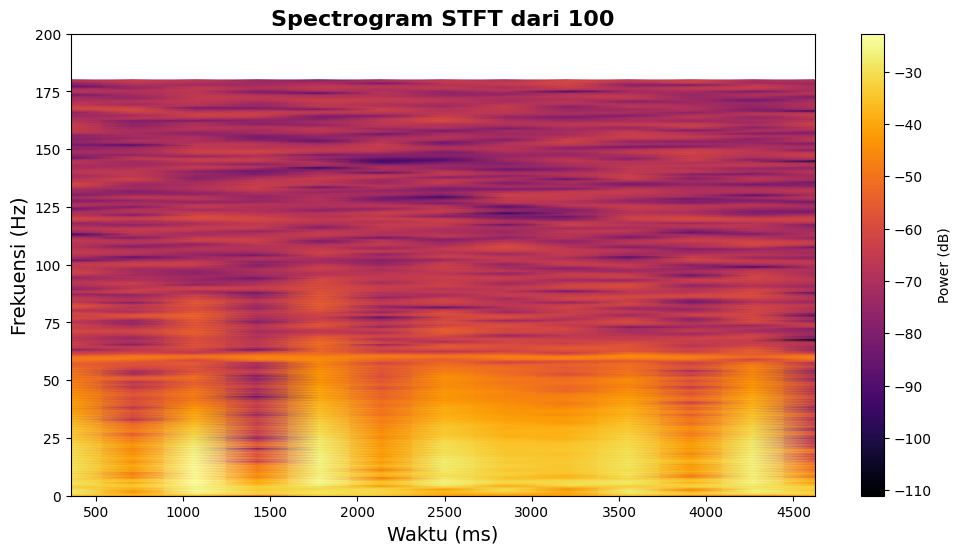

Memproses file: 101


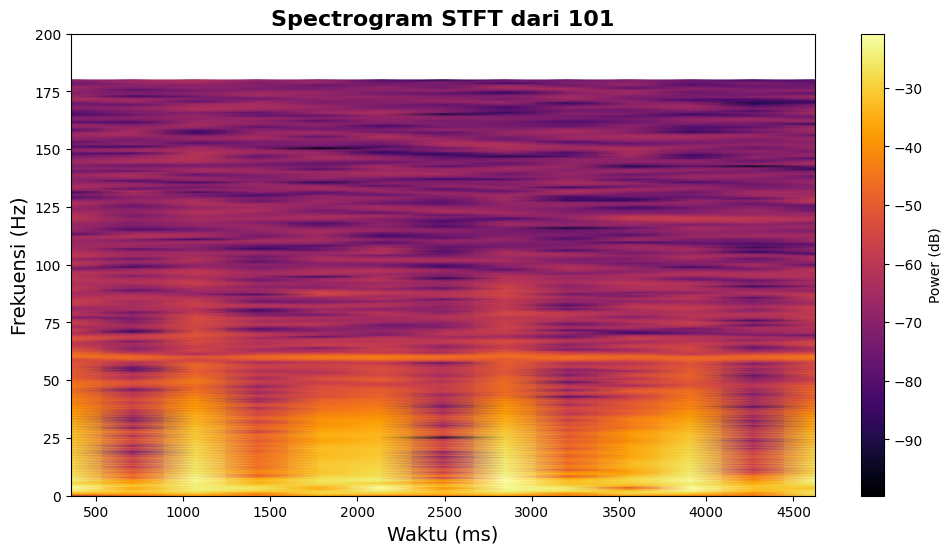

Memproses file: 102


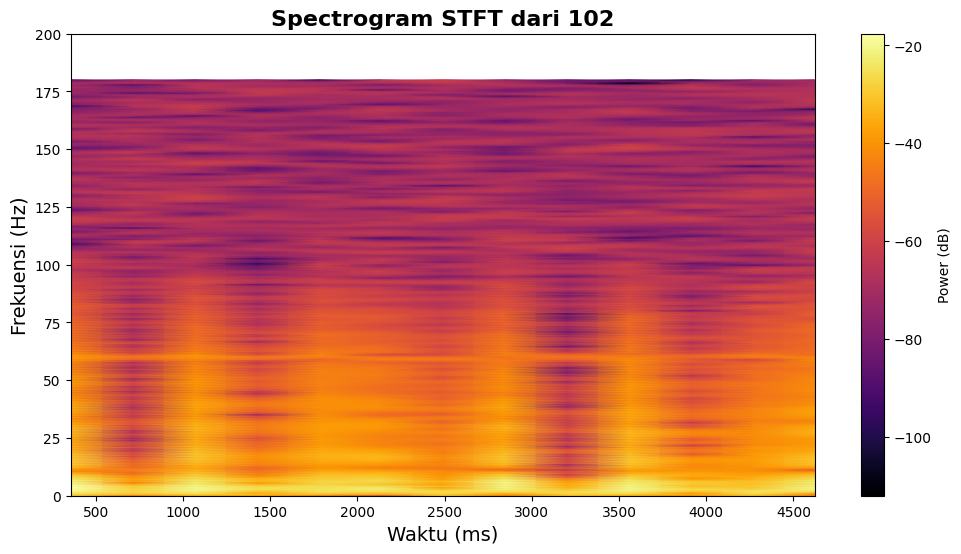

Memproses file: 103


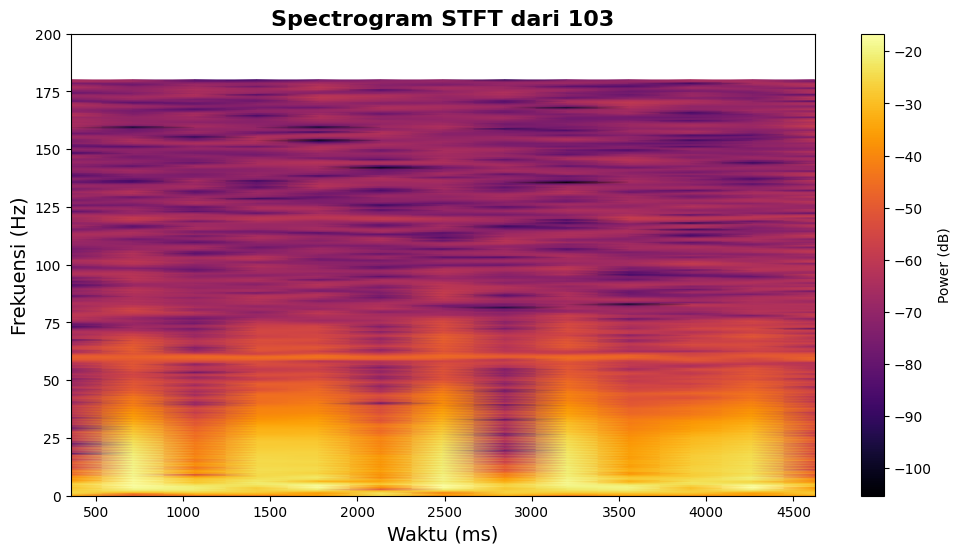

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


Fs = 360  # Frekuensi sampling dataset MIT-BIH
segment_len = 256  # Panjang segmen STFT
noverlap = 128  # Overlap antar segmen
NFFT = 512  # Resolusi FFT

# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Membaca rekaman ECG**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # **Ambil sinyal pertama**
    signal = record.p_signal[:, 0]
    time_ms = (np.arange(len(signal)) / Fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Hitung STFT menggunakan Spectrogram**
    f, t, Sxx = spectrogram(signal, fs=Fs, window='hamming', nperseg=segment_len, noverlap=noverlap, nfft=NFFT)

    # **Visualisasi Spectrogram STFT**
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t * 1000, f, 10 * np.log10(Sxx), shading='gouraud', cmap="inferno")
    plt.colorbar(label="Power (dB)")
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Frekuensi (Hz)", fontsize=14)
    plt.title(f"Spectrogram STFT dari {record_name}", fontsize=16, fontweight="bold")
    plt.ylim([0, 200])  # Fokus pada 0-100 Hz
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 3:  # Tampilkan 4 file pertama
        break


###  Discrete Wavelet Transform

Memproses file: 100


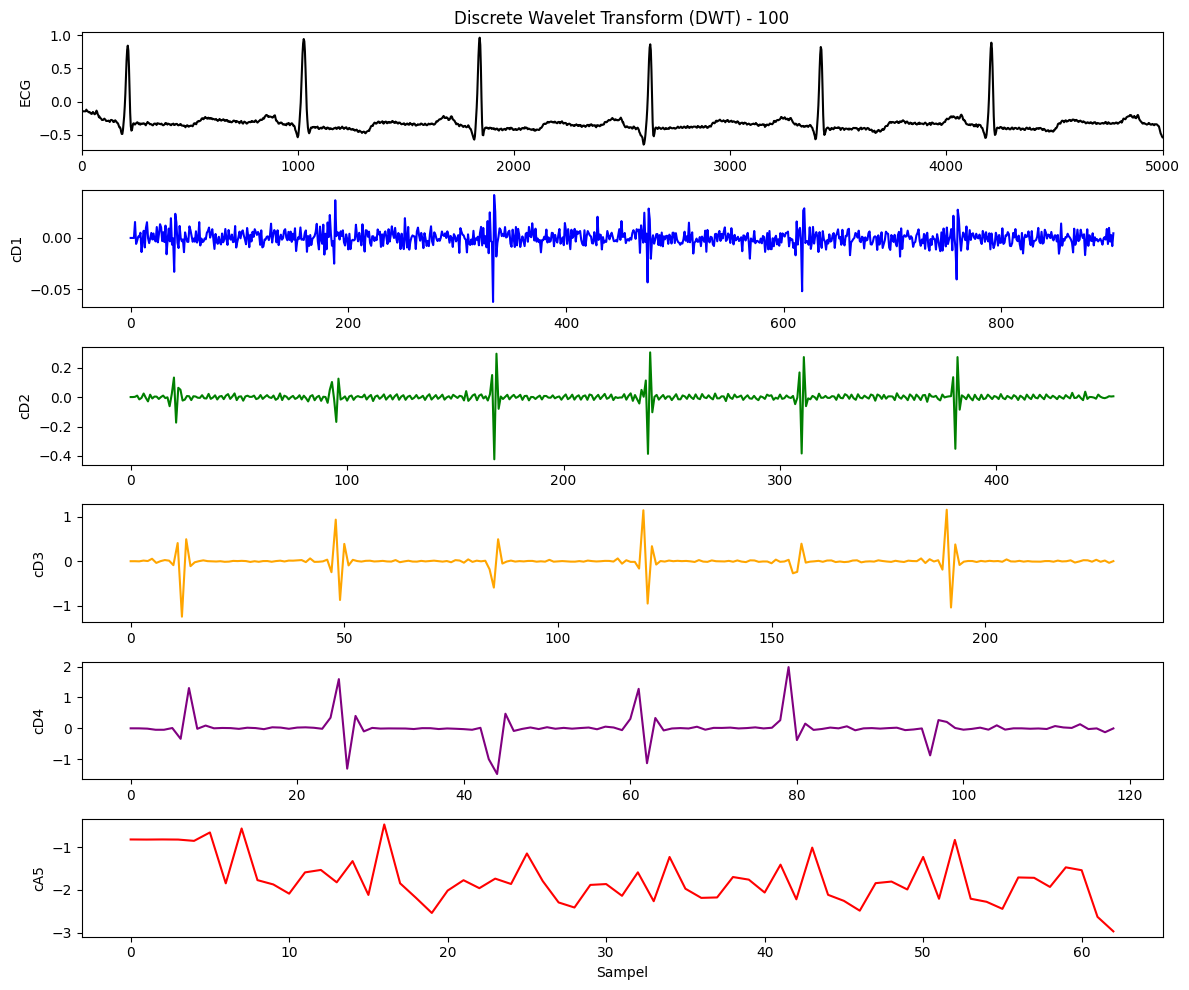

Memproses file: 101


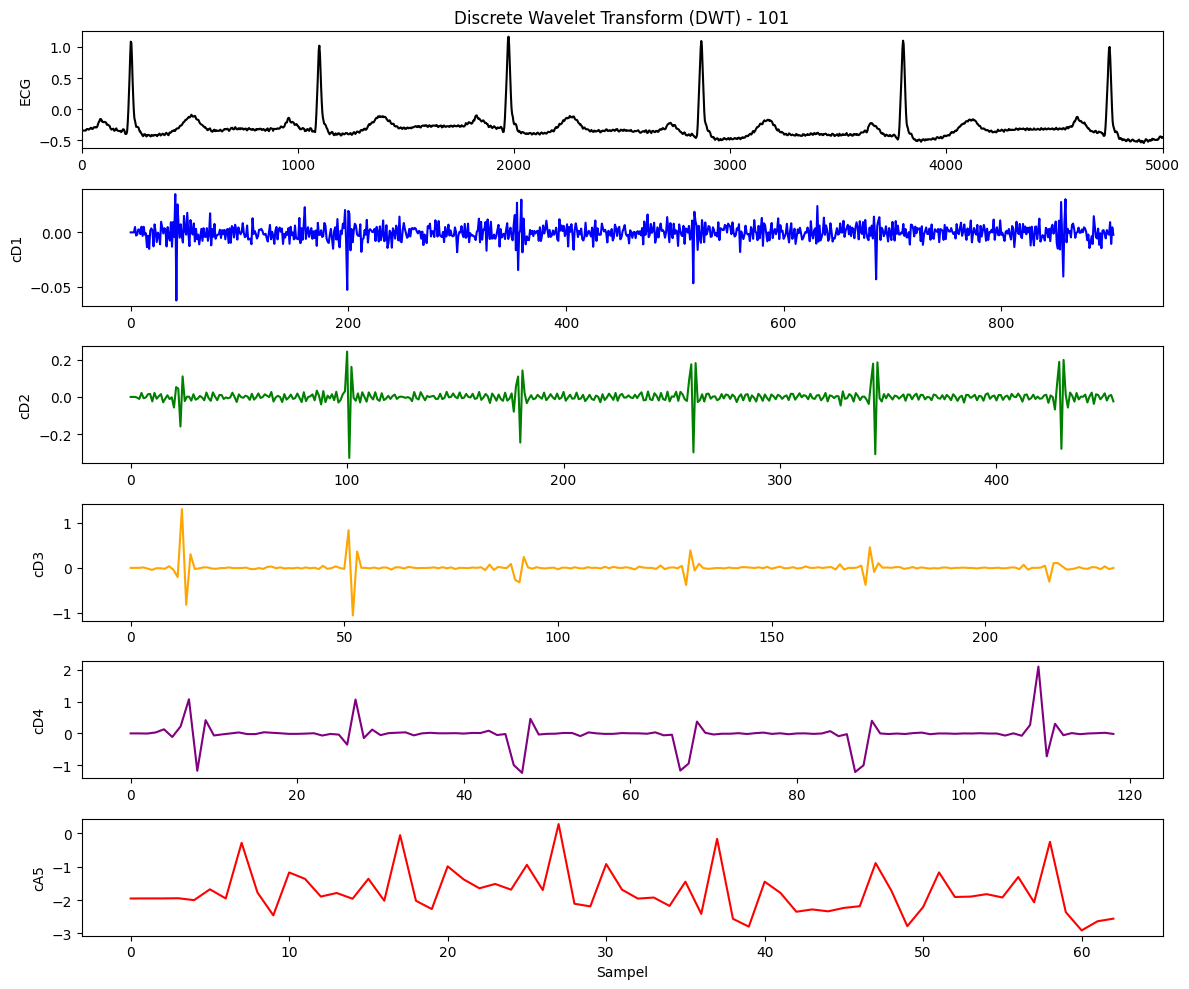

Memproses file: 102


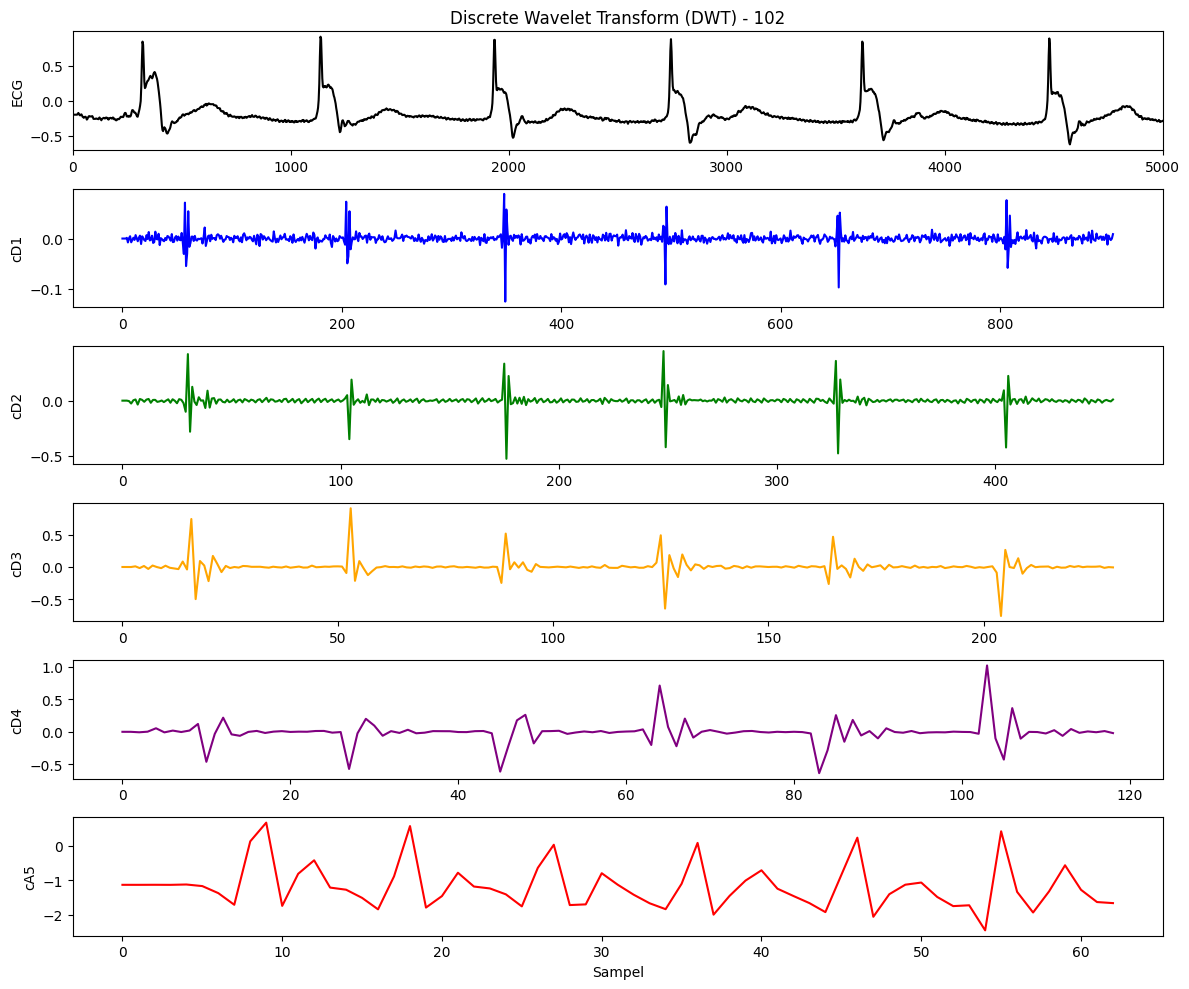

Memproses file: 103


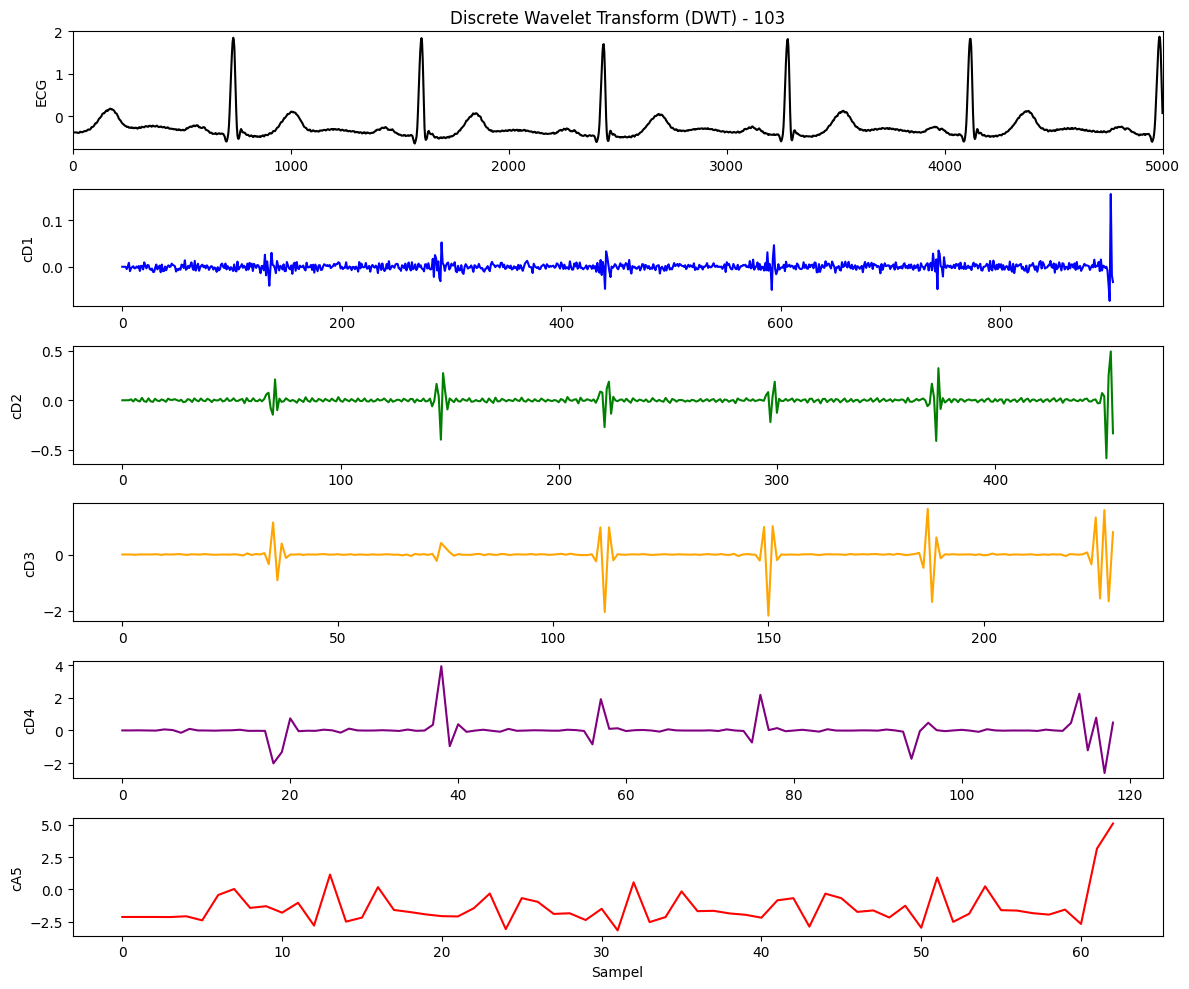

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
import pywt


Fs = 360  # Frekuensi sampling dataset MIT-BIH
wavelet = "db4"  # Wavelet yang digunakan
level = 5  # Level dekomposisi

# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Membaca rekaman ECG**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # **Ambil sinyal pertama dan pastikan 1D**
    signal = record.p_signal[:, 0].squeeze().astype(float)  # Pastikan 1D
    time_ms = (np.arange(len(signal)) / Fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Pastikan sinyal cukup panjang**
    if len(signal) < 128:
        print(f"Skipping {record_name}: Sinyal terlalu pendek untuk DWT.")
        continue

    # **Dekomposisi Wavelet hingga level 5**
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    cA5 = coeffs[0]  # Approximation coefficient (level 5)
    cD5, cD4, cD3, cD2, cD1 = coeffs[1:]  # Detail coefficients dari level 5 - 1

    # **Visualisasi sinyal asli dan hasil DWT**
    plt.figure(figsize=(12, 10))

    plt.subplot(6, 1, 1)
    plt.plot(time_ms, signal, label="Sinyal Asli", color="black")
    plt.ylabel("ECG")
    plt.title(f"Discrete Wavelet Transform (DWT) - {record_name}")
    plt.xlim([0, 5000])

    plt.subplot(6, 1, 2)
    plt.plot(cD1, label="cD1", color="blue")
    plt.ylabel("cD1")

    plt.subplot(6, 1, 3)
    plt.plot(cD2, label="cD2", color="green")
    plt.ylabel("cD2")

    plt.subplot(6, 1, 4)
    plt.plot(cD3, label="cD3", color="orange")
    plt.ylabel("cD3")

    plt.subplot(6, 1, 5)
    plt.plot(cD4, label="cD4", color="purple")
    plt.ylabel("cD4")

    plt.subplot(6, 1, 6)
    plt.plot(cA5, label="cA5 (Approximation)", color="red")
    plt.ylabel("cA5")
    plt.xlabel("Sampel")

    plt.tight_layout()
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 3:  # Tampilkan 4 file pertama
        break


### Stationary Wavelet Transform

Memproses file: 100


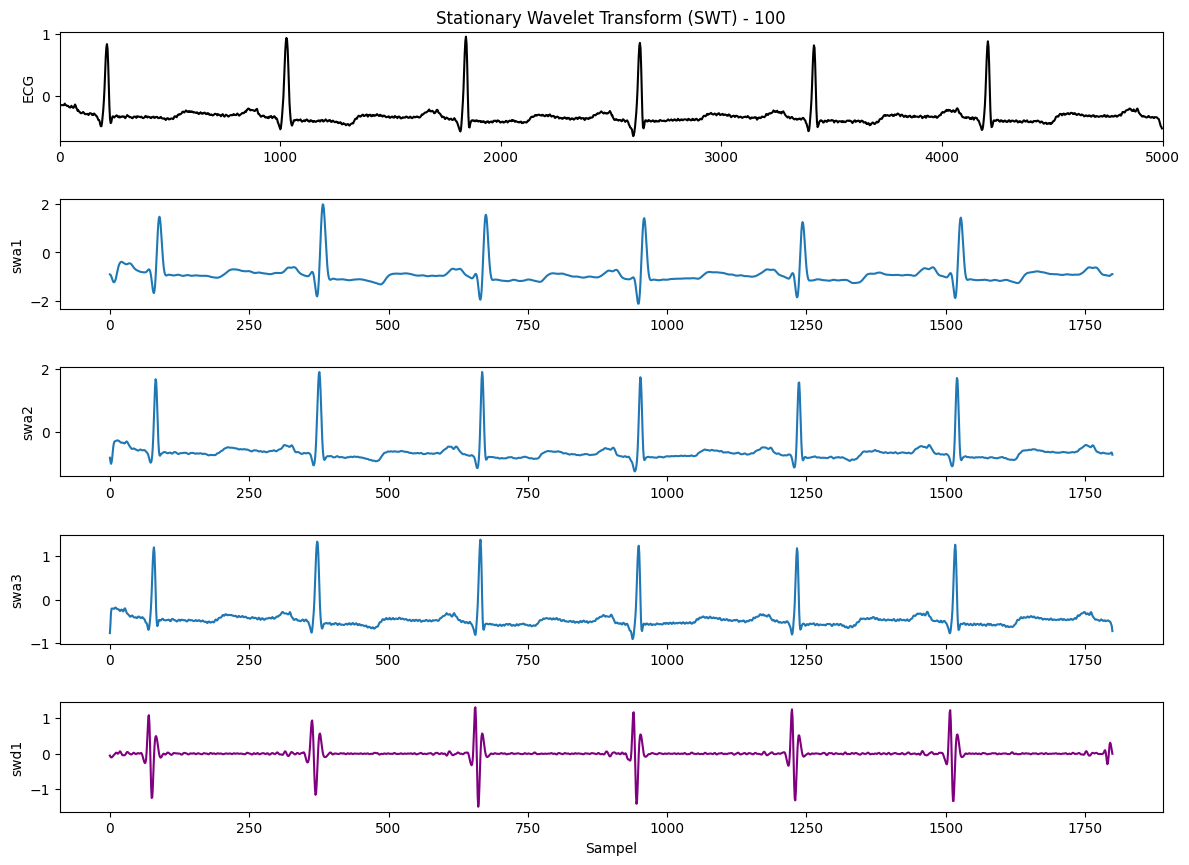

Memproses file: 101


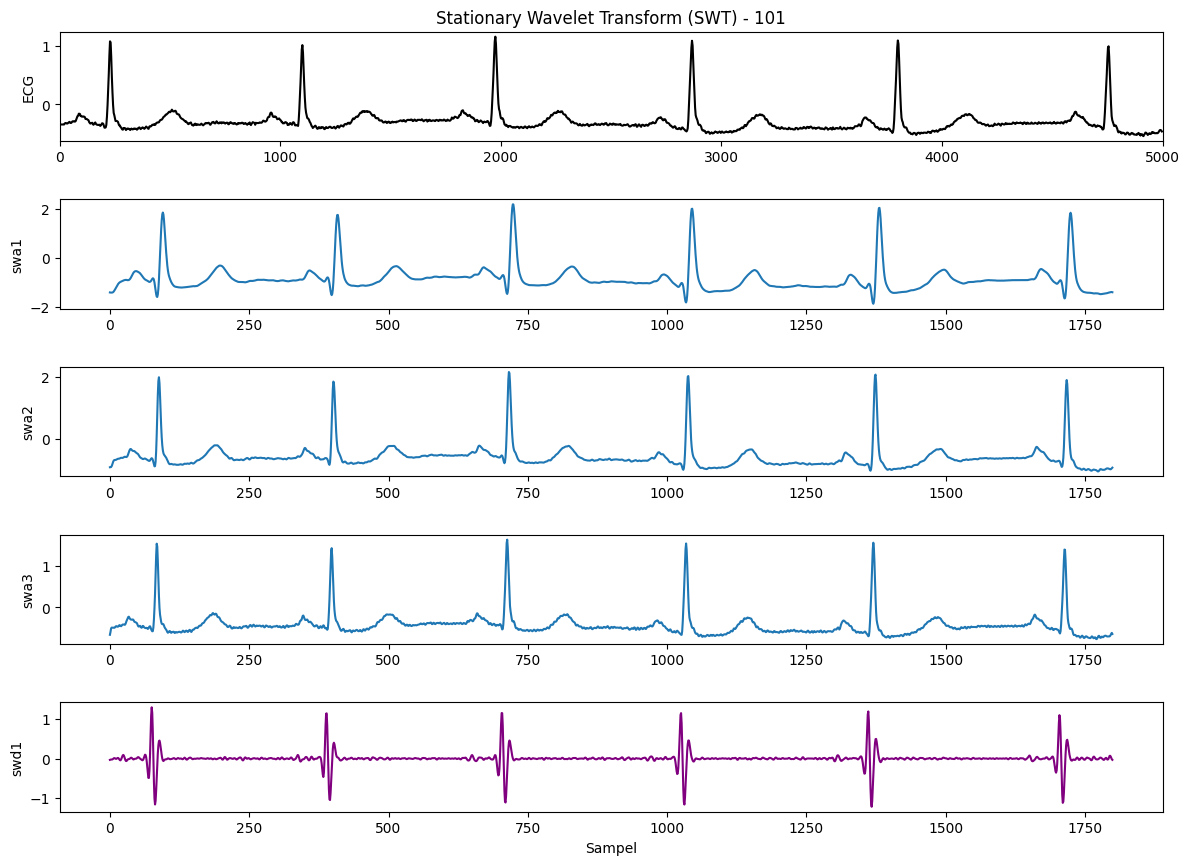

Memproses file: 102


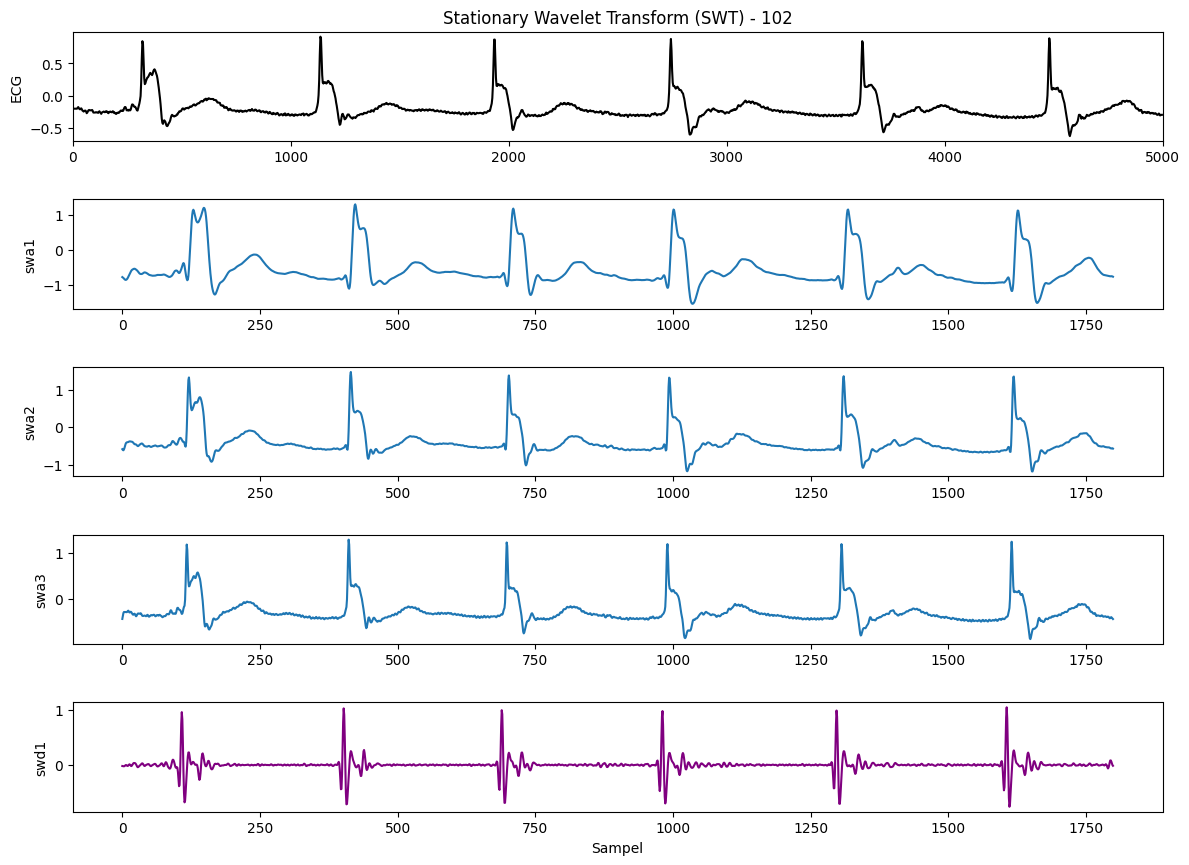

Memproses file: 103


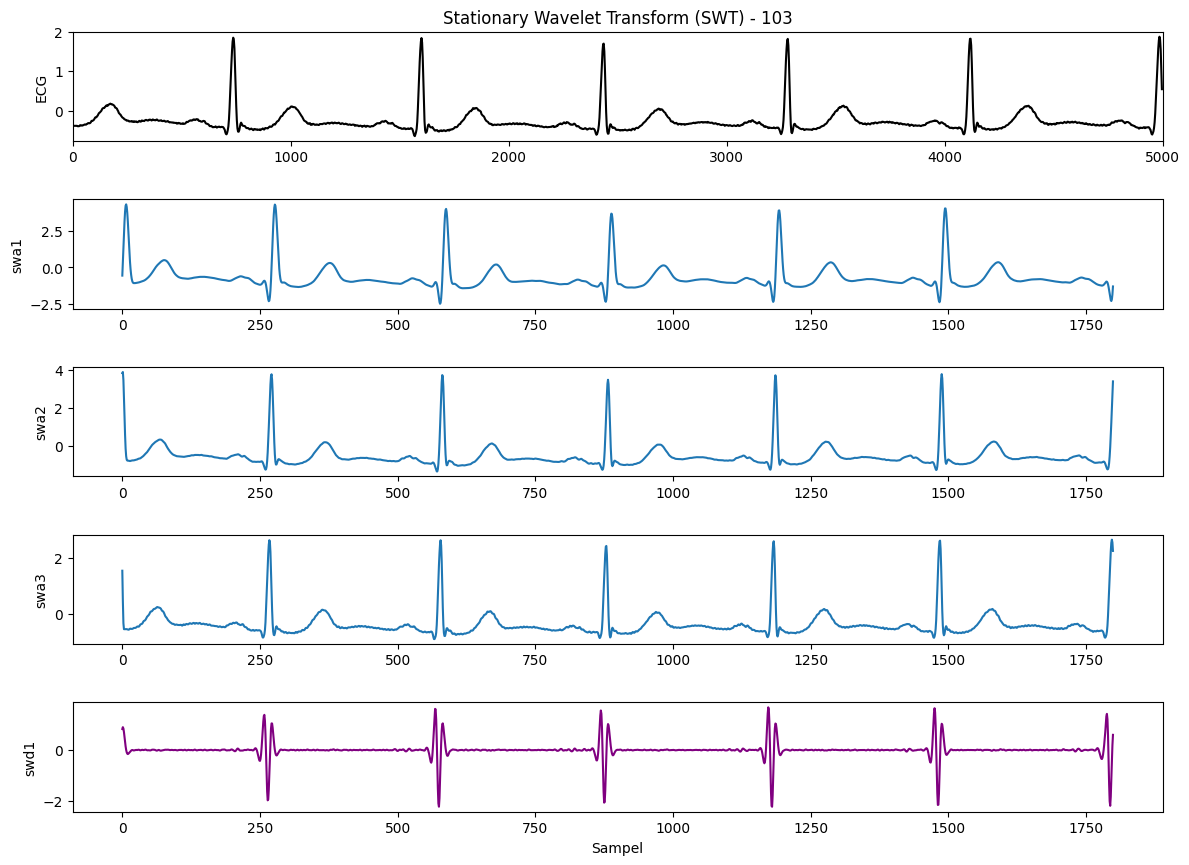

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
import pywt

Fs = 360  # Frekuensi sampling dataset MIT-BIH
wavelet = "db4"  # Wavelet yang digunakan

# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Membaca rekaman ECG**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # **Ambil sinyal pertama dan pastikan 1D**
    signal = record.p_signal[:, 0].squeeze().astype(float)  # Pastikan 1D
    time_ms = (np.arange(len(signal)) / Fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Pastikan panjang sinyal genap**
    if len(signal) % 2 != 0:
        signal = signal[:-1]  # Buang satu sampel terakhir agar genap

    # **Sesuaikan panjang time_ms agar tidak mismatch**
    time_ms = time_ms[:len(signal)]

    # **Hitung level maksimal yang bisa digunakan**
    max_level = pywt.swt_max_level(len(signal))
    level = min(5, max_level)  # Gunakan level maksimal yang diperbolehkan

    # **Dekomposisi SWT hingga level maksimal**
    coeffs = pywt.swt(signal, wavelet, level=level)
    swa = np.array([cA for cA, _ in coeffs])  # Approximation coefficients
    swd = np.array([cD for _, cD in coeffs])  # Detail coefficients

    # **Visualisasi sinyal asli dan hasil SWT**
    plt.figure(figsize=(12, 10))

    plt.subplot(6, 1, 1)
    plt.plot(time_ms, signal, label="Sinyal Asli", color="black")
    plt.ylabel("ECG")
    plt.title(f"Stationary Wavelet Transform (SWT) - {record_name}")
    plt.xlim([0, 5000])

    for i in range(min(4, level)):  # Plot hanya sesuai level yang tersedia
        plt.subplot(6, 1, i + 2)
        plt.plot(swa[i, :], label=f"swa{i+1}")
        plt.ylabel(f"swa{i+1}")

    plt.subplot(6, 1, min(5, level) + 2)
    plt.plot(swd[0, :], label="swd1", color="purple")
    plt.ylabel("swd1")

    plt.xlabel("Sampel")
    plt.tight_layout()
    plt.show()


    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 3:  # Tampilkan 4 file pertama
        break


### Wavelet Packet Decomposition

Memproses file: 100


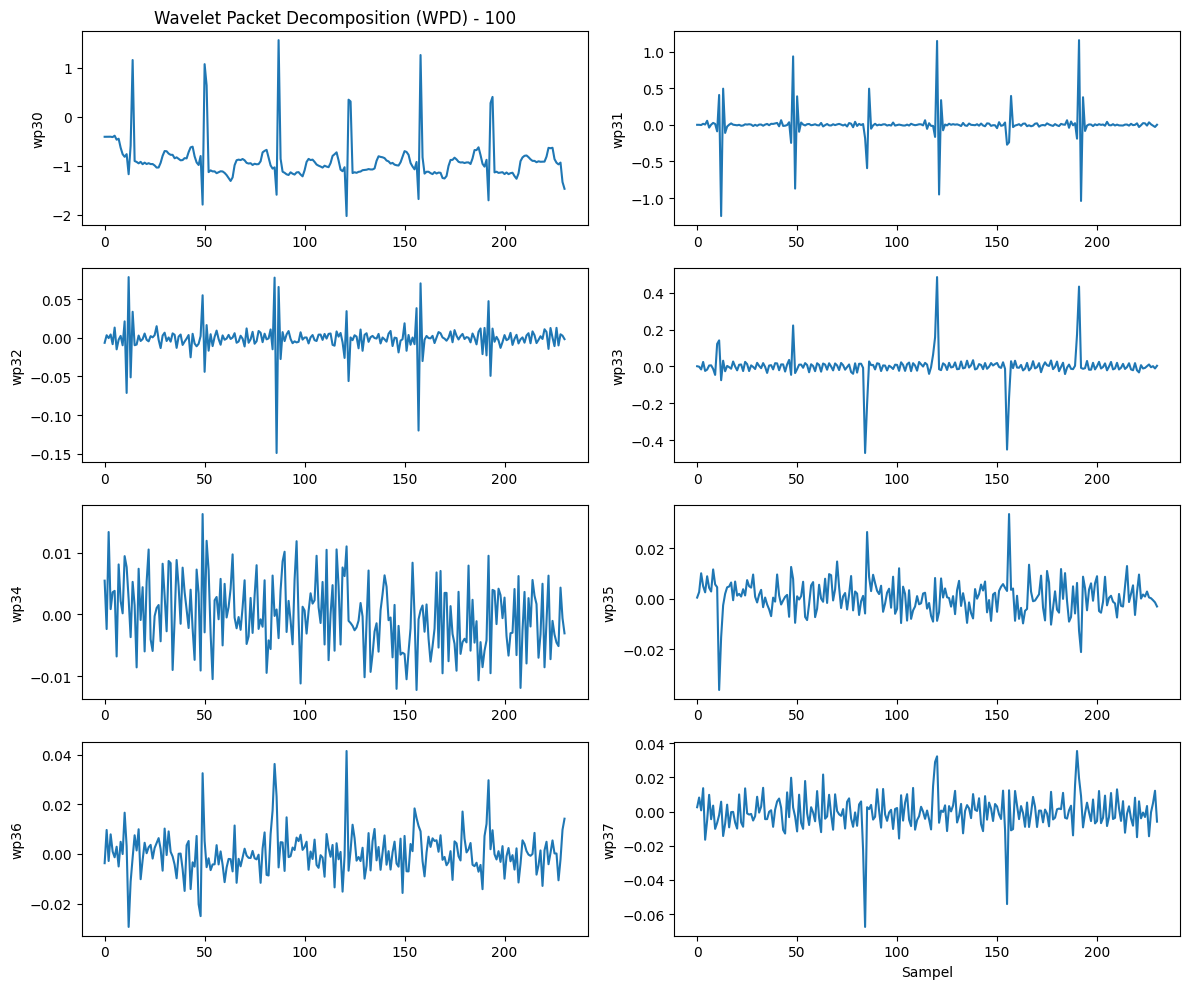

Memproses file: 101


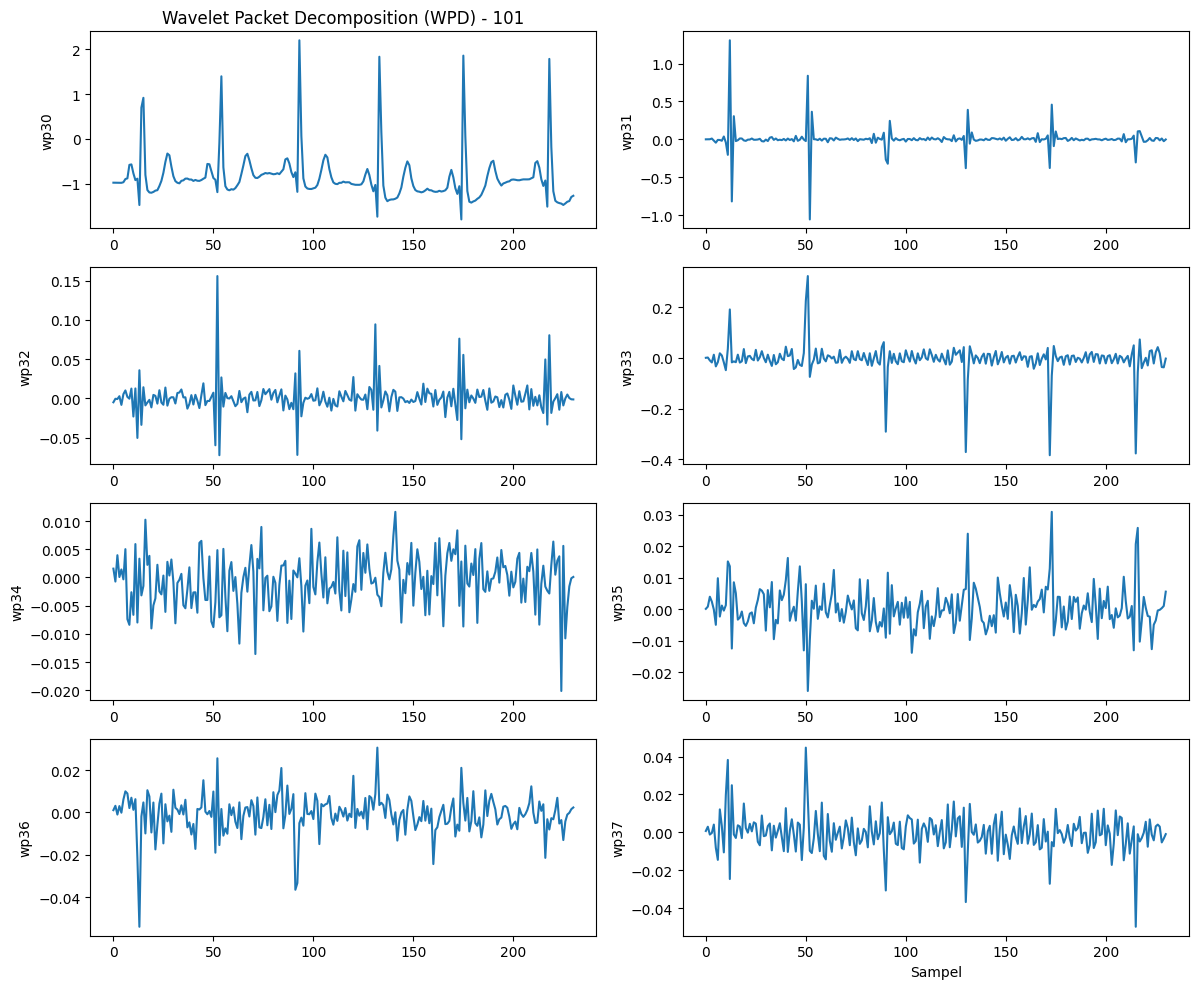

Memproses file: 102


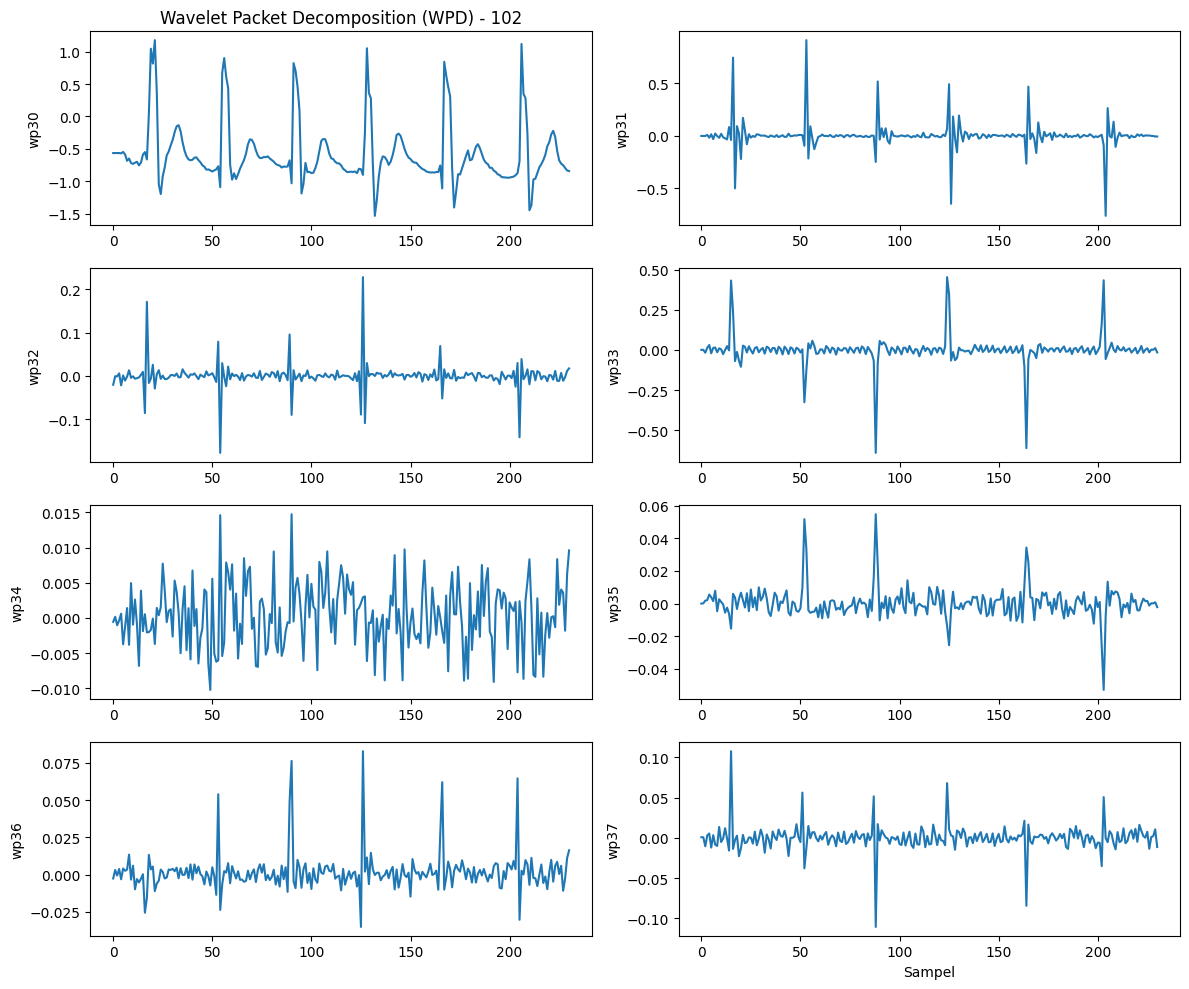

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
import pywt

Fs = 360  # Frekuensi sampling dataset MIT-BIH
wavelet = "db4"  # Wavelet yang digunakan
max_level = 3  # Level dekomposisi WPD

# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Membaca rekaman ECG**
    record = wfdb.rdrecord(os.path.join(data_path, record_name))

    # **Ambil sinyal pertama dan pastikan 1D**
    signal = record.p_signal[:, 0].squeeze().astype(float)  # Pastikan 1D
    time_ms = (np.arange(len(signal)) / Fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Pastikan panjang sinyal genap**
    if len(signal) % 2 != 0:
        signal = signal[:-1]  # Buang satu sampel terakhir agar genap

    # **Bangun pohon Wavelet Packet**
    wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode="symmetric", maxlevel=max_level)

    # **Ambil node dari WPD (sesuai contoh MATLAB)**
    wp30 = wp['aaa'].data
    wp31 = wp['aad'].data
    wp32 = wp['ada'].data
    wp33 = wp['add'].data
    wp34 = wp['daa'].data
    wp35 = wp['dad'].data
    wp36 = wp['dda'].data
    wp37 = wp['ddd'].data

    # **Visualisasi hasil WPD**
    plt.figure(figsize=(12, 10))

    plt.subplot(4, 2, 1)
    plt.plot(wp30, label="wp30")
    plt.ylabel("wp30")
    plt.title(f"Wavelet Packet Decomposition (WPD) - {record_name}")

    plt.subplot(4, 2, 2)
    plt.plot(wp31, label="wp31")
    plt.ylabel("wp31")

    plt.subplot(4, 2, 3)
    plt.plot(wp32, label="wp32")
    plt.ylabel("wp32")

    plt.subplot(4, 2, 4)
    plt.plot(wp33, label="wp33")
    plt.ylabel("wp33")

    plt.subplot(4, 2, 5)
    plt.plot(wp34, label="wp34")
    plt.ylabel("wp34")

    plt.subplot(4, 2, 6)
    plt.plot(wp35, label="wp35")
    plt.ylabel("wp35")

    plt.subplot(4, 2, 7)
    plt.plot(wp36, label="wp36")
    plt.ylabel("wp36")

    plt.subplot(4, 2, 8)
    plt.plot(wp37, label="wp37")
    plt.ylabel("wp37")

    plt.xlabel("Sampel")
    plt.tight_layout()
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 2:  # Tampilkan 3 file pertama
        break

###  Dual Tree Complex Wavelet Transform

In [ ]:
!pip install --upgrade dtcwt
import sys

# Check if dtcwt.numpy exists in the sys.modules before importing
if "dtcwt.numpy" not in sys.modules:
    # If not, import dtcwt.numpy manually to break the circular import
    import dtcwt.numpy  # Import numpy submodule explicitly

import wfdb
import numpy as np
import matplotlib.pyplot as plt
import dtcwt # import dtcwt after importing dtcwt.numpy

# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Muat sinyal ECG dari file MIT-BIH**
    record = wfdb.rdrecord(f"{data_path}/{record_name}")

    # Pilih channel pertama (ubah jika ingin channel lain)
    signal = record.p_signal[:, 0]

    # Pastikan panjang sinyal sesuai dengan syarat DTCWT (misalnya 1024, 2048, dst.)
    N = 2048  # Ubah jika perlu
    if len(signal) < N:
        print(f"Skipping {record_name}, sinyal terlalu pendek ({len(signal)} sampel)")
        continue
    signal = signal[:N]  # Potong sinyal jika lebih panjang dari N

    # **Lakukan DTCWT**
    transform = dtcwt.Transform1d()
    J = 4  # Level dekomposisi
    coeffs = transform.forward(signal, nlevels=J)

    # **Visualisasi hasil**
    fig, axs = plt.subplots(J, 2, figsize=(10, 8))
    for j in range(J):
        axs[j, 0].plot(coeffs.highpasses[j].real)
        axs[j, 0].set_title(f"{record_name} - Level {j+1} - Real Part")
        axs[j, 1].plot(coeffs.highpasses[j].imag)
        axs[j, 1].set_title(f"{record_name} - Level {j+1} - Imaginary Part")

    plt.tight_layout()
    plt.show()
    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 2:  # Tampilkan 3 file pertama
        break

AttributeError: partially initialized module 'dtcwt' has no attribute 'numpy' (most likely due to a circular import)

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import dtcwt
# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Muat sinyal ECG dari file MIT-BIH**
    record = wfdb.rdrecord(f"{data_path}/{record_name}")

    # Pilih channel pertama (ubah jika ingin channel lain)
    signal = record.p_signal[:, 0]

    # Pastikan panjang sinyal sesuai dengan syarat DTCWT (misalnya 1024, 2048, dst.)
    N = 2048  # Ubah jika perlu
    if len(signal) < N:
        print(f"Skipping {record_name}, sinyal terlalu pendek ({len(signal)} sampel)")
        continue
    signal = signal[:N]  # Potong sinyal jika lebih panjang dari N

    # **Lakukan DTCWT**
    transform = dtcwt.Transform1d()
    J = 4  # Level dekomposisi
    coeffs = transform.forward(signal, nlevels=J)

    # **Visualisasi hasil**
    fig, axs = plt.subplots(J, 2, figsize=(10, 8))
    for j in range(J):
        axs[j, 0].plot(coeffs.highpasses[j].real)
        axs[j, 0].set_title(f"{record_name} - Level {j+1} - Real Part")
        axs[j, 1].plot(coeffs.highpasses[j].imag)
        axs[j, 1].set_title(f"{record_name} - Level {j+1} - Imaginary Part")

    plt.tight_layout()
    plt.show()
    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 2:  # Tampilkan 3 file pertama
        break

AttributeError: partially initialized module 'dtcwt' has no attribute 'numpy' (most likely due to a circular import)

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import dtcwt

# **Loop melalui beberapa file ECG**
for record_name in record_files:
    print(f"Memproses file: {record_name}")

    # **Muat sinyal ECG dari file MIT-BIH**
    record = wfdb.rdrecord(f"{data_path}/{record_name}")

    # Pilih channel pertama (ubah jika ingin channel lain)
    signal = record.p_signal[:, 0]

    # Pastikan panjang sinyal sesuai dengan syarat DTCWT (misalnya 1024, 2048, dst.)
    N = 2048  # Ubah jika perlu
    if len(signal) < N:
        print(f"Skipping {record_name}, sinyal terlalu pendek ({len(signal)} sampel)")
        continue
    signal = signal[:N]  # Potong sinyal jika lebih panjang dari N

    # **Lakukan DTCWT**
    transform = dtcwt.Transform1d()
    J = 4  # Level dekomposisi
    coeffs = transform.forward(signal, nlevels=J)

    # **Ambil koefisien dari level 1 hingga 4**
    def get_coefficients(coeffs, level):
        """Mengambil koefisien real dan imaginary dari level tertentu."""
        real_part = coeffs.highpasses[level].real
        imag_part = coeffs.highpasses[level].imag
        return real_part, imag_part

    w11, w12 = get_coefficients(coeffs, 0)
    w21, w22 = get_coefficients(coeffs, 1)
    w31, w32 = get_coefficients(coeffs, 2)
    w41, w42 = get_coefficients(coeffs, 3)

    # **Visualisasi hasil**
    fig, axs = plt.subplots(4, 2, figsize=(10, 8))

    axs[0, 0].plot(w11)
    axs[0, 0].set_ylabel("w11")
    axs[0, 0].set_title(f"{record_name} - Level 1")

    axs[0, 1].plot(w12)
    axs[0, 1].set_ylabel("w12")

    axs[1, 0].plot(w21)
    axs[1, 0].set_ylabel("w21")
    axs[1, 0].set_title(f"{record_name} - Level 2")

    axs[1, 1].plot(w22)
    axs[1, 1].set_ylabel("w22")

    axs[2, 0].plot(w31)
    axs[2, 0].set_ylabel("w31")
    axs[2, 0].set_title(f"{record_name} - Level 3")

    axs[2, 1].plot(w32)
    axs[2, 1].set_ylabel("w32")

    axs[3, 0].plot(w41)
    axs[3, 0].set_ylabel("w41")
    axs[3, 0].set_title(f"{record_name} - Level 4")

    axs[3, 1].plot(w42)
    axs[3, 1].set_ylabel("w42")

    plt.tight_layout()
    plt.show()

    # **Batasi jumlah file yang diproses**
    if record_files.index(record_name) >= 2:  # Tampilkan 3 file pertama
        break


## Analisis Wavelet Transform Tambahan

In [ ]:
import pywt

# loop untuk Wavelet Transform pada semua file
for record_name in record_files:
    print(f"Analisis Wavelet untuk {record_name}")

    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]
    fs = record.fs
    time = np.arange(len(signal)) / fs

    # Continuous Wavelet Transform (CWT)
    coeffs, freqs = pywt.cwt(signal[:5000], scales=np.arange(1, 128), wavelet='morl', sampling_period=1/fs)

    # Visualisasi hasil Wavelet Transform
    plt.figure(figsize=(10, 5))
    plt.imshow(coeffs, aspect='auto', cmap='jet', extent=[time[0], time[5000], 1, 128])
    plt.colorbar(label="Magnitude")
    plt.ylabel("Skala Wavelet")
    plt.xlabel("Waktu (detik)")
    plt.title(f"Wavelet Transform untuk {record_name}")
    plt.show()


In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
import pywt
from scipy.fft import fft, fftfreq
from google.colab import drive

for record_name in record_files:
    print(f"Membaca file: {record_name}")

    # Membaca rekaman dan anotasi
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    annotation = wfdb.rdann(os.path.join(data_path, record_name), "atr")

    # Ambil data sinyal pertama
    signal = record.p_signal[:, 0]
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal Waktu**
    plt.figure(figsize=(15, 5))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG/ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 200))  # Interval 200 ms
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()


    # **Wavelet Transform (CWT) dengan Morlet Wavelet**
    scales = np.arange(1, 128)  # Skala wavelet
    coeffs, freqs = pywt.cwt(signal[:5000], scales=scales, wavelet='morl', sampling_period=1/fs)

    # **Visualisasi Wavelet Transform**
    plt.figure(figsize=(15, 6))
    plt.imshow(np.abs(coeffs), aspect='auto', cmap='jet', extent=[0, 5000, 1, 128])
    plt.colorbar(label="Kekuatan Koefisien Wavelet")
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Skala Wavelet", fontsize=14)
    plt.title(f"Wavelet Transform dari {record_name} (Morlet)", fontsize=16, fontweight="bold")
    plt.show()

    # **Batasi jumlah file yang divisualisasikan**
    if record_files.index(record_name) >= 2:  # tampilkan 3 file pertama
        break


### Analisis perbandinagan berbagai jenis Wavelet Transform

Kode di bawah ini menganalisis sinyal ECG/ECG dari MIT-BIH Arrhythmia Dataset menggunakan Continuous Wavelet Transform (CWT) dengan wavelet: Morlet (morl), Complex Morlet (cmor), Mexican Hat (mexh), Gaussian (gaus1), dan Shannon (shan). Visualisasi dilakukan dalam rentang 0 - 5000 ms.


| **Wavelet**   | **Karakteristik** | **Kegunaan** |
|--------------|----------------|------------|
| **Morlet (`morl`)** | Kombinasi sinusoidal dan Gaussian | Analisis spektrum waktu-frekuensi |
| **Complex Morlet (`cmor`)** | Versi kompleks dari Morlet | Resolusi lebih tajam dalam domain frekuensi |
| **Mexican Hat (`mexh`)** | Turunan kedua dari Gaussian | Deteksi fitur atau puncak dalam sinyal |
| **Gaussian (`gaus1`)** | Bentuk Gaussian pertama | Mendeteksi perubahan cepat dalam sinyal |
| **Shannon (`shan`)** | Diskontinu dengan properti seperti filter ideal | Analisis frekuensi dengan resolusi tajam |

- **Morlet (`morl`)** paling umum digunakan untuk analisis spektrum waktu-frekuensi.  
- **Complex Morlet (`cmor`)** memberikan resolusi lebih baik dalam domain frekuensi.  
- **Mexican Hat (`mexh`)** cocok untuk deteksi perubahan cepat pada sinyal.  
- **Gaussian (`gaus1`)** berguna untuk mendeteksi transisi tajam dalam sinyal ECG/ECG.  
- **Shannon (`shan`)** memberikan resolusi frekuensi tinggi tetapi kurang presisi dalam waktu.  


In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
import pywt
from google.colab import drive


wavelets = ["morl", "cmor", "mexh", "gaus1", "shan"]

for record_name in record_files[:4]:
    print(f"Membaca file: {record_name}")

    # Membaca rekaman
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # **Filter hanya rentang 0 - 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Visualisasi Sinyal Asli**
    plt.figure(figsize=(15, 4))
    plt.plot(time_ms, signal, label=f"Rekaman: {record_name}", linewidth=1.5)
    plt.xlabel("Waktu (ms)", fontsize=14)
    plt.ylabel("Amplitudo", fontsize=14)
    plt.title(f"Sinyal ECG/ECG dari {record_name}", fontsize=16, fontweight="bold")
    plt.xticks(np.arange(0, 5200, 200))  # Interval 200 ms
    plt.legend(fontsize=12)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

    # **Wavelet Transform dengan berbagai wavelet**
    scales = np.arange(1, 128)  # Skala wavelet
    fig, axes = plt.subplots(len(wavelets), 1, figsize=(15, 3 * len(wavelets)))

    for i, wavelet in enumerate(wavelets):
        coeffs, freqs = pywt.cwt(signal[:5000], scales=scales, wavelet=wavelet, sampling_period=1/fs)

        im = axes[i].imshow(np.abs(coeffs), aspect='auto', cmap='jet', extent=[0, 5000, 1, 128])
        axes[i].set_title(f"CWT dengan {wavelet}", fontsize=14, fontweight="bold")
        axes[i].set_ylabel("Skala Wavelet", fontsize=12)
        axes[i].grid(linestyle="--", alpha=0.5)

        # **Tambahkan colorbar untuk setiap plot**
        cbar = fig.colorbar(im, ax=axes[i], orientation="vertical")
        cbar.set_label("Intensitas Koefisien", fontsize=12)

    axes[-1].set_xlabel("Waktu (ms)", fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import emd
from scipy.signal import hilbert

# Loop untuk setiap file ECG
for record_name in record_files[:3]:  # Proses 3 file pertama sebagai contoh
    print(f"Memproses file: {record_name}")

    # Baca rekaman
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # **Batasan waktu: hanya tampilkan dari 0 hingga 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **STFT (Spectrogram)**
    frequencies, times, Sxx = spectrogram(signal, fs, nperseg=256)

    # **Visualisasi Spectrogram (STFT)**
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(times * 1000, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='jet')
    plt.colorbar(label="Power (dB)")
    plt.title(f"{record_name} - Spectrogram (STFT)", fontsize=16, fontweight='bold')
    plt.xlabel("Time (ms)", fontsize=14)
    plt.ylabel("Frequency (Hz)", fontsize=14)
    plt.ylim([0, 100])  # Batas frekuensi hingga 100 Hz
    plt.grid(alpha=0.5, linestyle="--")
    plt.show()


## Analisis Lanjutan, Proses Denoised dan Penggunaan Z-score

##

In [ ]:
import os
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, bessel, filtfilt, medfilt
from scipy.stats import zscore
from google.colab import drive


#  Fungsi untuk berbagai filter
def butter_lowpass_filter(signal, cutoff=50, fs=360, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

def cheby1_lowpass_filter(signal, cutoff=50, fs=360, order=4, rp=0.5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = cheby1(order, rp, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

def bessel_lowpass_filter(signal, cutoff=50, fs=360, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = bessel(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

def median_filter(signal, kernel_size=5):
    return medfilt(signal, kernel_size=kernel_size)

# 5. Loop untuk membaca, menerapkan filter, dan memvisualisasikan
for record_name in record_files[:3]:  # Proses 3 file pertama
    print(f"Memproses file: {record_name}")

    # Baca rekaman
    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]
    fs = record.fs
    time_ms = (np.arange(len(signal)) / fs) * 1000  # Konversi ke milidetik

    # **Batasan waktu: hanya tampilkan dari 0 hingga 5000 ms**
    mask = (time_ms >= 0) & (time_ms <= 5000)
    time_ms = time_ms[mask]
    signal = signal[mask]

    # **Denoised dengan berbagai filter**
    butter_filtered = butter_lowpass_filter(signal, cutoff=50, fs=fs, order=4)
    cheby1_filtered = cheby1_lowpass_filter(signal, cutoff=50, fs=fs, order=4)
    bessel_filtered = bessel_lowpass_filter(signal, cutoff=50, fs=fs, order=4)
    median_filtered = median_filter(signal, kernel_size=5)

    # **Z-score Normalization**
    signal_zscore = zscore(signal)
    butter_zscore = zscore(butter_filtered)
    cheby1_zscore = zscore(cheby1_filtered)
    bessel_zscore = zscore(bessel_filtered)
    median_zscore = zscore(median_filtered)

    # **Visualisasi Gabungan**
    plt.figure(figsize=(20, 18))  # Ukuran lebih besar

    xticks = np.arange(0, 5500, 500)  # Konfigurasi sumbu X dalam interval 500 ms

    # Plot 1: Original Signal
    plt.subplot(4, 1, 1)
    plt.plot(time_ms, signal, label="Original Signal", color='black', linewidth=1.5)
    plt.title(f"{record_name} - Original Signal", fontsize=18, fontweight='bold')
    plt.xlabel("Time (ms)", fontsize=16)
    plt.ylabel("Amplitude", fontsize=16)
    plt.xticks(xticks)
    plt.legend(fontsize=14)
    plt.grid(linestyle="--", alpha=0.7)

    # Plot 2: Denoised (Filtered)
    plt.subplot(4, 1, 2)
    plt.plot(time_ms, butter_filtered, label="Butterworth", color='blue', linewidth=1)
    plt.plot(time_ms, cheby1_filtered, label="Chebyshev", color='green', linewidth=1)
    plt.plot(time_ms, bessel_filtered, label="Bessel", color='red', linewidth=1)
    plt.plot(time_ms, median_filtered, label="Median", color='purple', linewidth=1)
    plt.title(f"{record_name} - Denoised (Filtered)", fontsize=18, fontweight='bold')
    plt.xlabel("Time (ms)", fontsize=16)
    plt.ylabel("Amplitude", fontsize=16)
    plt.xticks(xticks)
    plt.legend(fontsize=14)
    plt.grid(linestyle="--", alpha=0.7)

    # Plot 3: Z-score Normalization (Tanpa Filter)
    plt.subplot(4, 1, 3)
    plt.plot(time_ms, signal_zscore, label="Z-score Only", color='orange', linewidth=1.5)
    plt.title(f"{record_name} - Z-score Normalized (No Filter)", fontsize=18, fontweight='bold')
    plt.xlabel("Time (ms)", fontsize=16)
    plt.ylabel("Z-score", fontsize=16)
    plt.xticks(xticks)
    plt.legend(fontsize=14)
    plt.grid(linestyle="--", alpha=0.7)

    # Plot 4: Denoised + Z-score
    plt.subplot(4, 1, 4)
    plt.plot(time_ms, butter_zscore, label="Butterworth", color='blue', linewidth=1)
    plt.plot(time_ms, cheby1_zscore, label="Chebyshev", color='green', linewidth=1)
    plt.plot(time_ms, bessel_zscore, label="Bessel", color='red', linewidth=1)
    plt.plot(time_ms, median_zscore, label="Median", color='purple', linewidth=1)
    plt.title(f"{record_name} - Denoised + Z-score Normalized", fontsize=18, fontweight='bold')
    plt.xlabel("Time (ms)", fontsize=16)
    plt.ylabel("Z-score", fontsize=16)
    plt.xticks(xticks)
    plt.legend(fontsize=14)
    plt.grid(linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

    # **Visualisasi Individual untuk Setiap Filter**
    filters = {
        "Butterworth": butter_filtered,
        "Chebyshev Type I": cheby1_filtered,
        "Bessel": bessel_filtered,
        "Median": median_filtered
    }

    for filter_name, filtered_signal in filters.items():
        plt.figure(figsize=(12, 5))
        plt.plot(time_ms, filtered_signal, label=f"{filter_name} Filter", linewidth=1.5)
        plt.title(f"{record_name} - {filter_name} Filter", fontsize=16, fontweight='bold')
        plt.xlabel("Time (ms)", fontsize=14)
        plt.ylabel("Amplitude", fontsize=14)
        plt.xticks(xticks)
        plt.legend(fontsize=12)
        plt.grid(linestyle="--", alpha=0.7)
        plt.show()

    # **Visualisasi Individual untuk Filter + Z-score**
    for filter_name, filtered_signal in {
        "Butterworth + Z-score": butter_zscore,
        "Chebyshev + Z-score": cheby1_zscore,
        "Bessel + Z-score": bessel_zscore,
        "Median + Z-score": median_zscore
    }.items():
        plt.figure(figsize=(12, 5))
        plt.plot(time_ms, filtered_signal, label=filter_name, linewidth=1.5)
        plt.title(f"{record_name} - {filter_name}", fontsize=16, fontweight='bold')
        plt.xlabel("Time (ms)", fontsize=14)
        plt.ylabel("Z-score", fontsize=14)
        plt.xticks(xticks)
        plt.legend(fontsize=12)
        plt.grid(linestyle="--", alpha=0.7)
        plt.show()
